In [ ]:
# Functions for Substring Operations: Adjusting Comment Character Length to
# 80 Characters

standard_comment_length <- function(cmt) {
    cmt <- str_trim(cmt)
    trail_under_score <-  "----------------------------------------------------------------------"
    full_comment <- paste("# ", cmt, trail_under_score)
    standardized_cmt <- str_sub(full_comment, 1, 80)
    return(standardized_cmt)
}

standard_comment_length('View the structure of the dataset')


[1] "#  View the structure of the dataset -------------------------------------------"

In [1]:
# FITE7410 Financial Fraud Analytics First Semester, 2025-2026 -----------------
# Assignnment 1 Exploratory Data Analysis (EDA)
# Student: Choi Chi For 3036384024
# Due Date: 19 Oct, 2025 (Sun) 23:59
# Objective of this assignment:
# 1. Perform data cleaning and preparation
# 2. Explore and visualize the data to identify patterns and trends
# 3. Engineer new features based on domain knowledge or insights from EDA
# 4. Prepare a report summarizing the findings from EDA

# Load necessary libraries with improved error handling ------------------
.libPaths(Sys.getenv("R_LIBS_USER"))
dir.create(Sys.getenv("R_LIBS_USER"), recursive = TRUE, showWarnings = FALSE)

# Install essential packages individually to avoid tidyverse dependencies
essential_packages <- c("dplyr", "tidyr", "ggplot2", "corrplot", "stringr")

cat("Installing essential R packages...\n")
for (pkg in essential_packages) {
  if (!require(pkg, character.only = TRUE, quietly = TRUE)) {
    cat("Installing", pkg, "...\n")
    install.packages(pkg, lib = Sys.getenv("R_LIBS_USER"), 
                     repos = "https://cran.r-project.org", 
                     dependencies = TRUE)
  }
}

# Load libraries with suppressed startup messages
suppressPackageStartupMessages({
  library(dplyr, lib.loc = Sys.getenv("R_LIBS_USER"))
  library(tidyr, lib.loc = Sys.getenv("R_LIBS_USER"))
  library(ggplot2, lib.loc = Sys.getenv("R_LIBS_USER"))
  library(corrplot, lib.loc = Sys.getenv("R_LIBS_USER"))
  library(stringr, lib.loc = Sys.getenv("R_LIBS_USER"))
})
# Load necessary libraries -----------------------------------------------------
# Set up user library path
user_lib <- file.path(Sys.getenv("HOME"), "R", "library")
dir.create(user_lib, recursive = TRUE, showWarnings = FALSE)
.libPaths(c(user_lib, .libPaths()))

# Check and install required packages
required_packages <- c("dplyr", "tidyr", "ggplot2", "corrplot", "tidyverse")

for (package in required_packages) {
  if (!require(package, character.only = TRUE, quietly = TRUE)) {
    install.packages(package, lib = user_lib, dependencies = TRUE)
    library(package, character.only = TRUE)
  }
}

cat("✓ Essential packages loaded successfully!\n")
cat("Note: Using individual packages instead of full tidyverse to avoid system dependency issues.\n")

Installing essential R packages...
Installing dplyr ...


also installing the dependencies ‘askpass’, ‘openssl’, ‘farver’, ‘viridisLite’, ‘cachem’, ‘sass’, ‘bit’, ‘diffobj’, ‘pkgconfig’, ‘profmem’, ‘httr’, ‘blob’, ‘gtable’, ‘isoband’, ‘S7’, ‘scales’, ‘prettyunits’, ‘bslib’, ‘fontawesome’, ‘jquerylib’, ‘tinytex’, ‘bit64’, ‘memoise’, ‘plogr’, ‘brio’, ‘praise’, ‘waldo’, ‘generics’, ‘tibble’, ‘tidyselect’, ‘bench’, ‘broom’, ‘covr’, ‘DBI’, ‘dbplyr’, ‘ggplot2’, ‘Lahman’, ‘lobstr’, ‘microbenchmark’, ‘nycflights13’, ‘rmarkdown’, ‘RMySQL’, ‘RPostgreSQL’, ‘RSQLite’, ‘testthat’, ‘tidyr’


Warning message in install.packages(pkg, lib = Sys.getenv("R_LIBS_USER"), repos = "https://cran.r-project.org", :
“installation of package ‘RMySQL’ had non-zero exit status”
Warning message in install.packages(pkg, lib = Sys.getenv("R_LIBS_USER"), repos = "https://cran.r-project.org", :
“installation of package ‘RPostgreSQL’ had non-zero exit status”


Installing corrplot ...


also installing the dependencies ‘iterators’, ‘permute’, ‘ca’, ‘colorspace’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘seriation’, ‘prettydoc’


also installing the dependencies ‘rematch’, ‘data.table’, ‘gargle’, ‘cellranger’, ‘ids’, ‘rematch2’, ‘timechange’, ‘systemfonts’, ‘textshaping’, ‘clipr’, ‘vroom’, ‘tzdb’, ‘progress’, ‘selectr’, ‘Rcpp’, ‘conflicted’, ‘dtplyr’, ‘forcats’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘hms’, ‘lubridate’, ‘modelr’, ‘ragg’, ‘readr’, ‘readxl’, ‘reprex’, ‘rstudioapi’, ‘rvest’, ‘feather’, ‘mockr’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ tibble    3.3.0
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


✓ Essential packages loaded successfully!
Note: Using individual packages instead of full tidyverse to avoid system dependency issues.


In [78]:
#  Load data -------------------------------------------------------------------
tryCatch({
  data <- data.frame(read.csv("A1_data.csv"))
}, warning = function(w) {
  
  print(w)
}, error = function(e) {
  print(e)
}, finally = {
print("Data loading attempt finished.")
})

head(data, n = 20)


[1] "Data loading attempt finished."


,TxnID,isFraud,TxnDT,TxnDTHour,TxnAmt,ProductCD,addr1,addr2,dist1,dist2,⋯,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DevType,DevInfo
,<int>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<lgl>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
1,2987004,0,86506,24,82.90000,TP,402,73,NA,NA,⋯,samsung browser 6.2,32,2220x1080,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,SAMSUNG SM-G892A Build/NRD90M
2,2987011,0,86555,24,27.28170,LY,NA,NA,NA,30,⋯,chrome 62.0,NA,,,FALSE,FALSE,TRUE,TRUE,desktop,
3,2987016,0,86620,24,49.70000,TP,152,73,NA,NA,⋯,chrome 62.0,24,1280x800,match_status:2,TRUE,FALSE,TRUE,TRUE,desktop,MacOS
4,2987022,0,86786,24,82.90000,TP,281,73,NA,NA,⋯,,NA,,,NA,NA,NA,NA,,
5,2987038,0,87172,24,41.40000,AD,312,73,NA,98,⋯,chrome 62.0,32,1920x1080,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,
6,2987040,0,87209,24,125.87242,LY,NA,NA,NA,NA,⋯,chrome 62.0,NA,,,FALSE,FALSE,TRUE,TRUE,desktop,Windows
7,2987048,0,87317,24,70.10804,LY,NA,NA,NA,NA,⋯,chrome 62.0,NA,,,FALSE,FALSE,TRUE,TRUE,desktop,Windows
8,2987057,0,87445,24,82.90000,TP,186,73,NA,NA,⋯,chrome 62.0 for android,32,1920x1080,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,SM-G930V Build/NRD90M
9,2987069,0,87725,24,33.10000,AD,312,73,NA,84,⋯,chrome 62.0,32,1920x1080,match_status:2,TRUE,FALSE,TRUE,TRUE,desktop,


In [ ]:
#  View summary statistics of the dataset --------------------------------------
summary(data)

Var1,Var2,Freq
<chr>,<chr>,<chr>
,TxnID,Min. :2987004
,TxnID,1st Qu.:3078716
,TxnID,Median :3203512
,TxnID,Mean :3238037
,TxnID,3rd Qu.:3393812
,TxnID,Max. :3577534
,TxnID,NA
,isFraud,Min. :0.0000
,isFraud,1st Qu.:0.0000


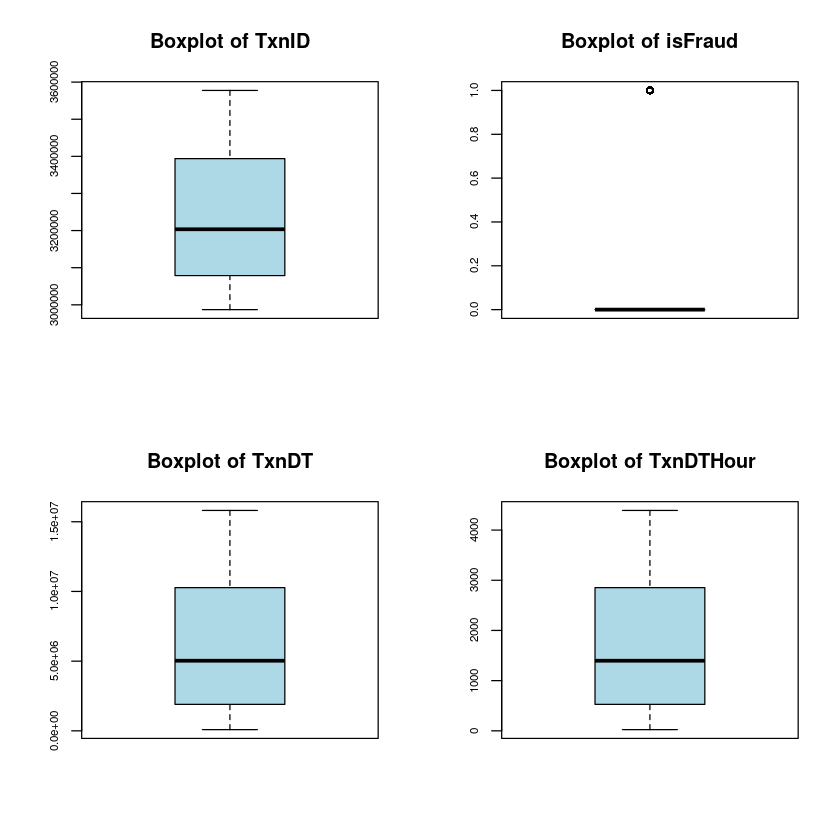

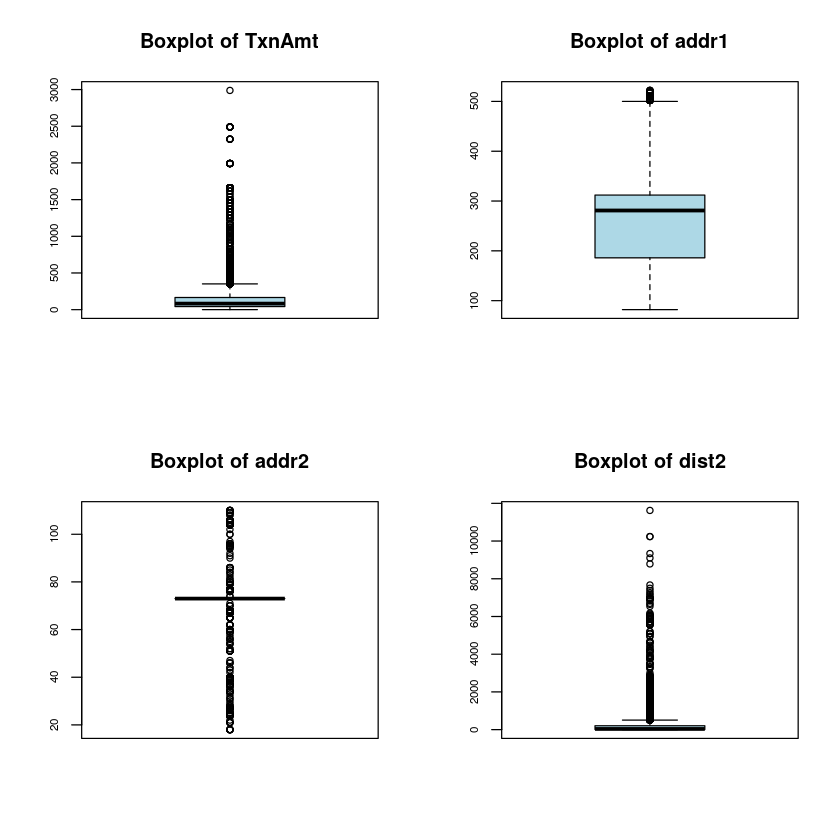

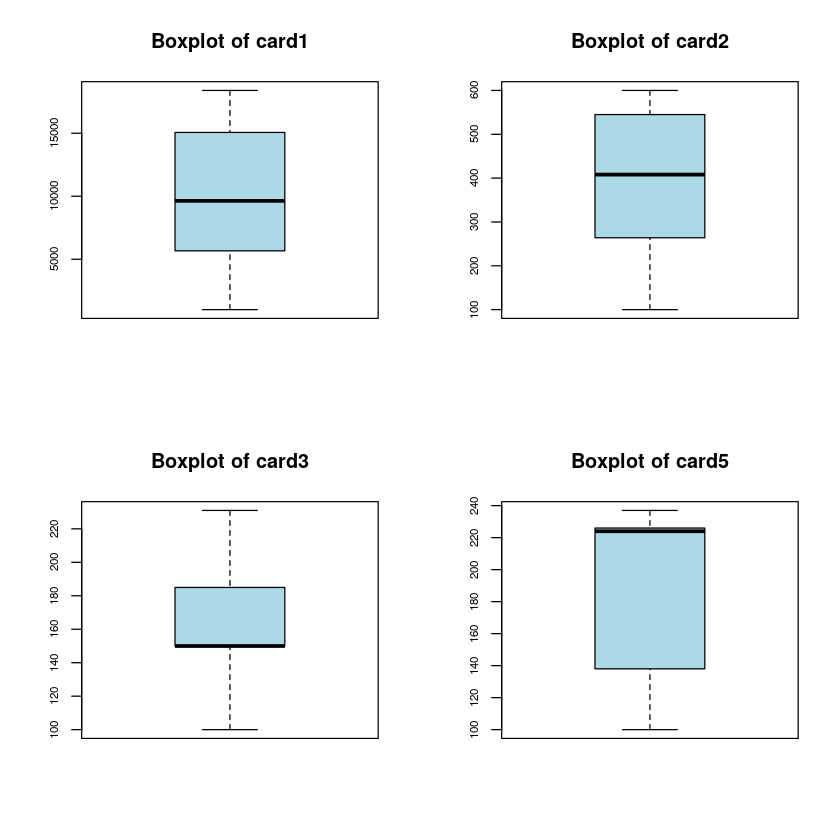

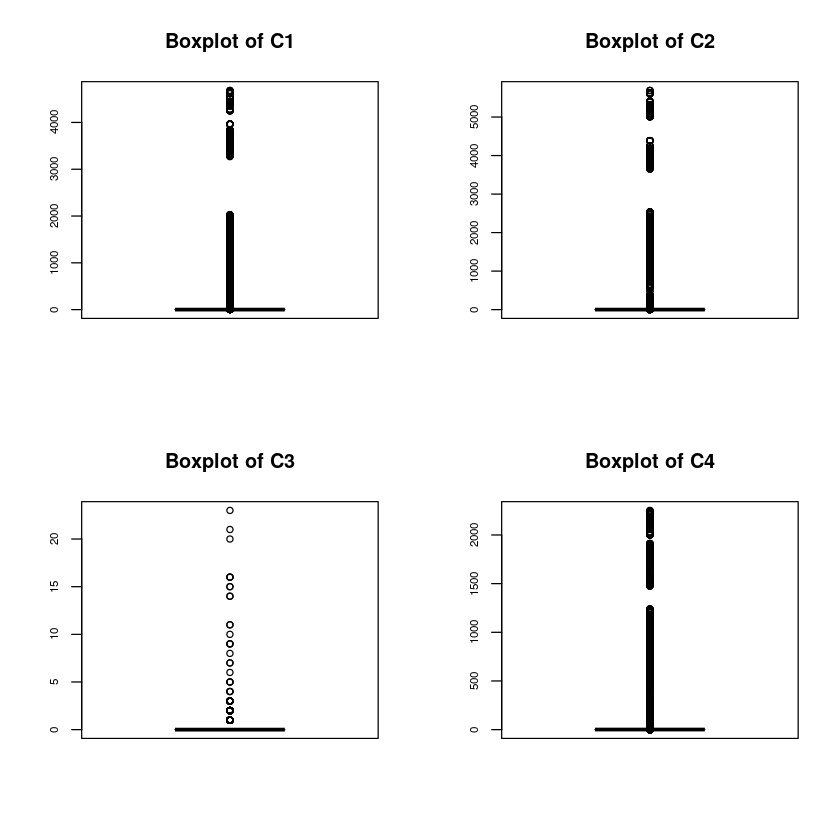

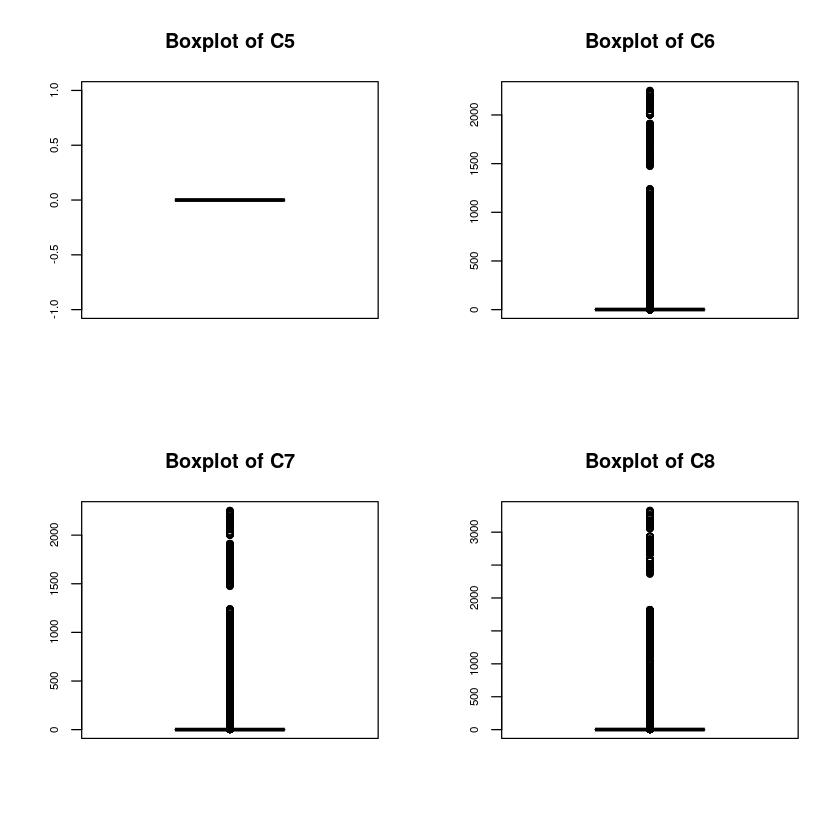

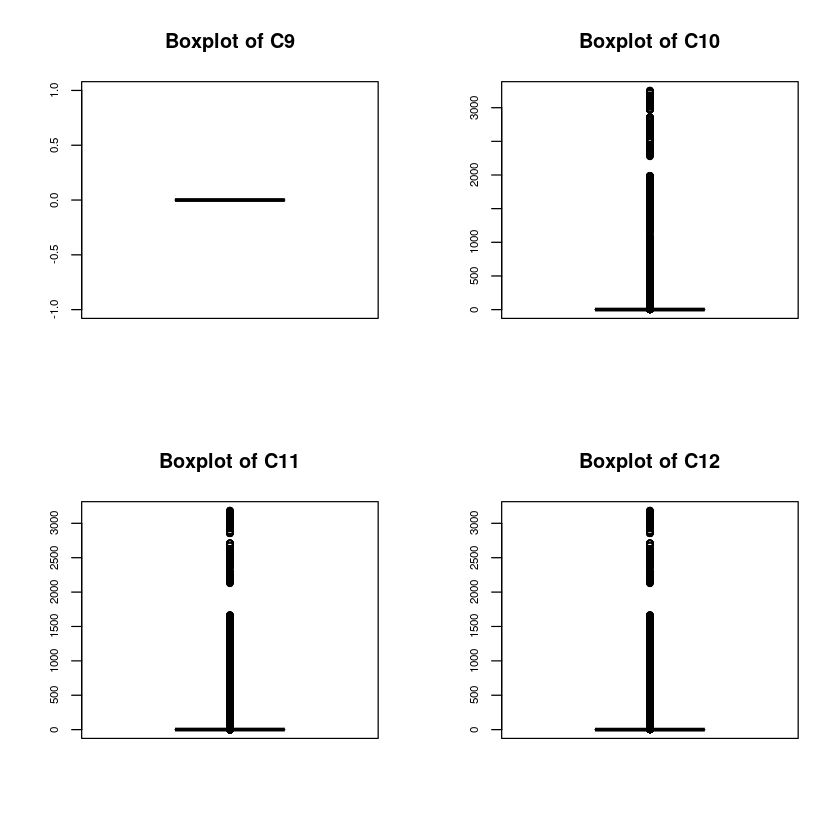

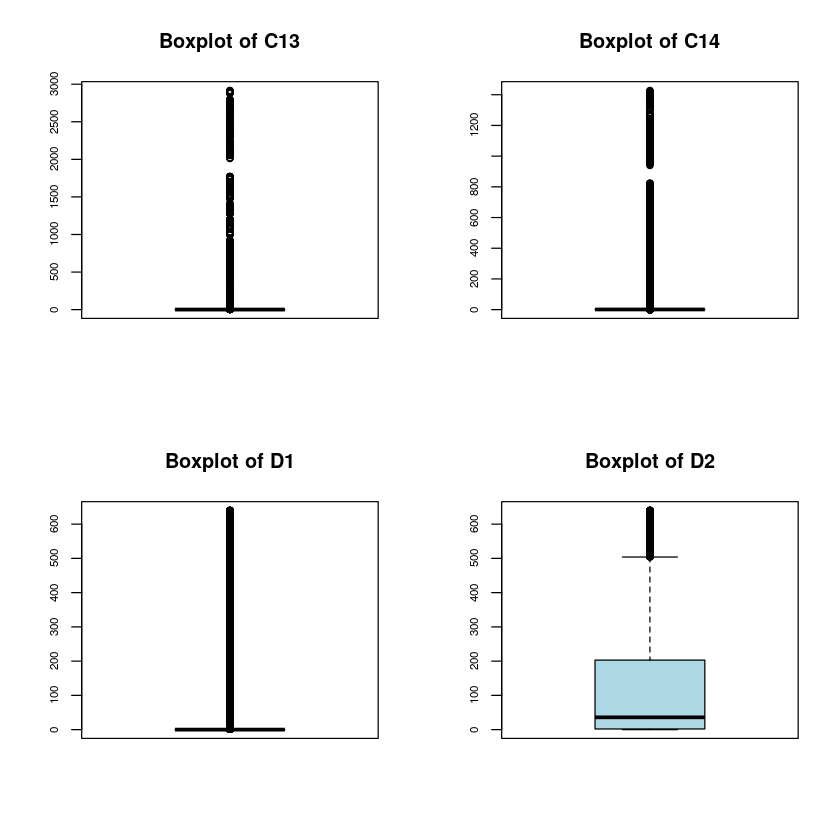

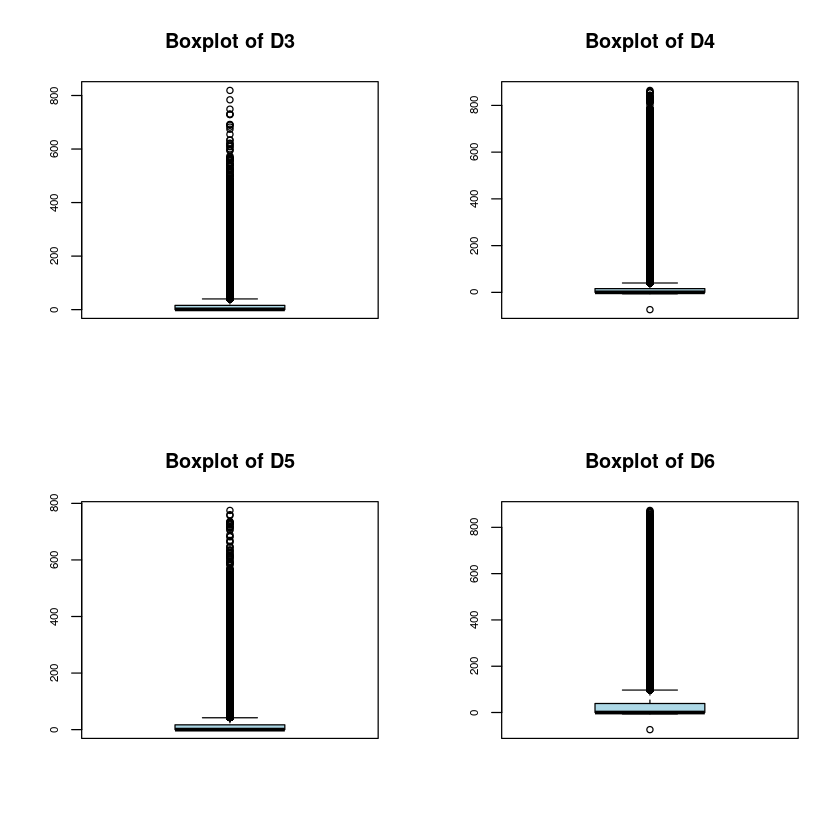

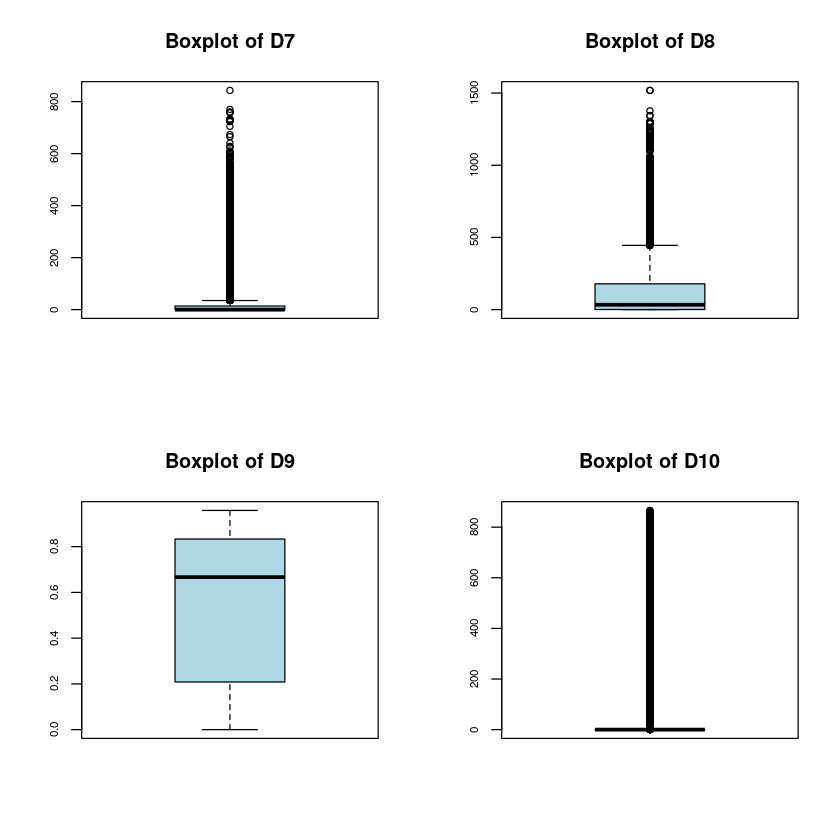

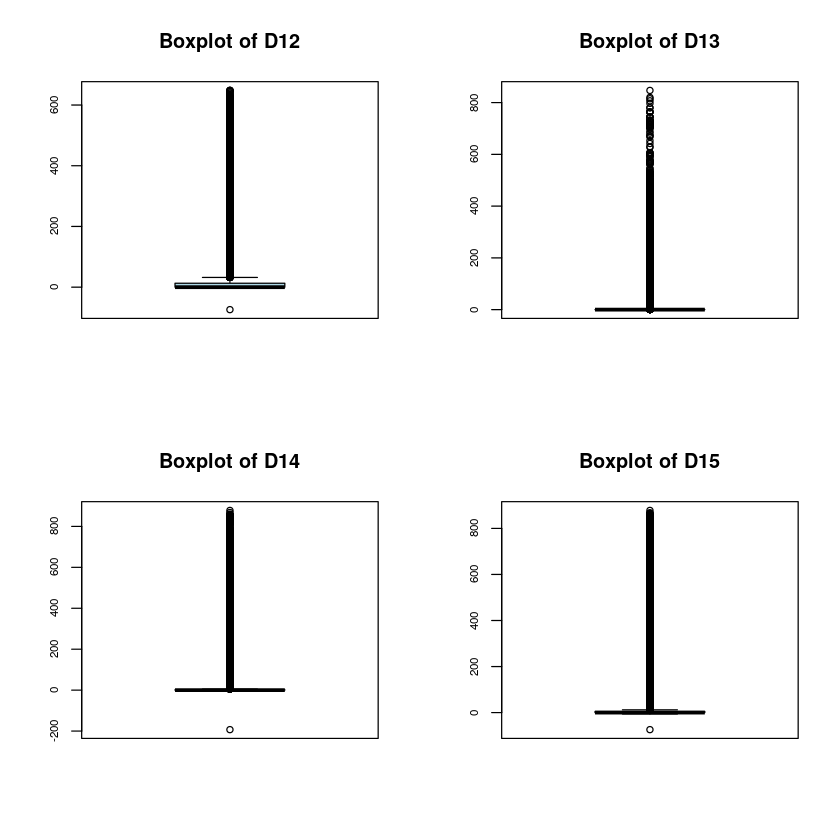

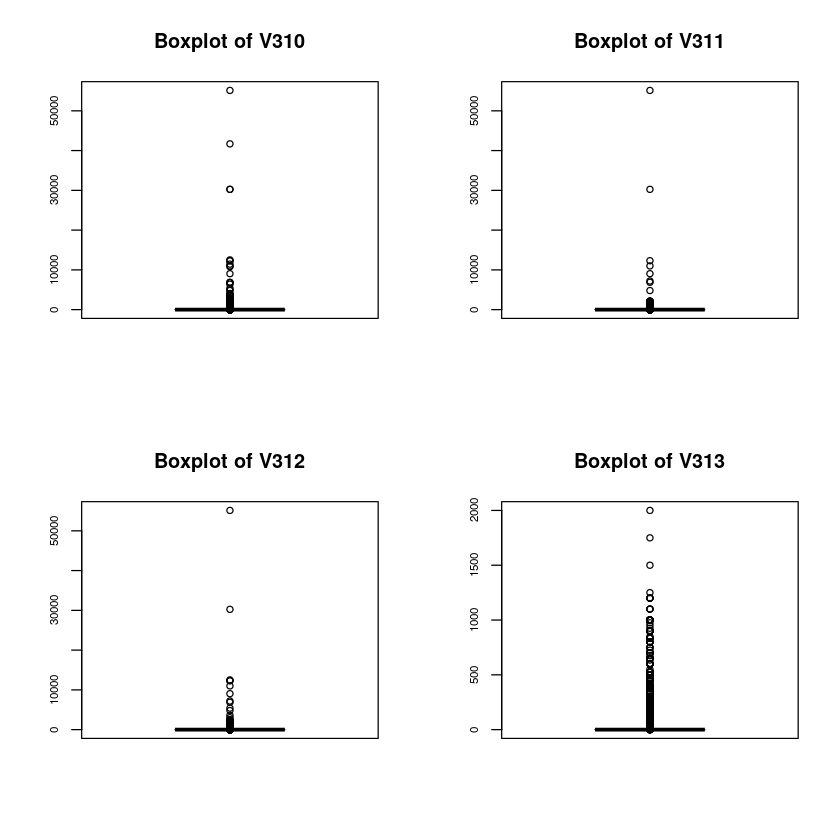

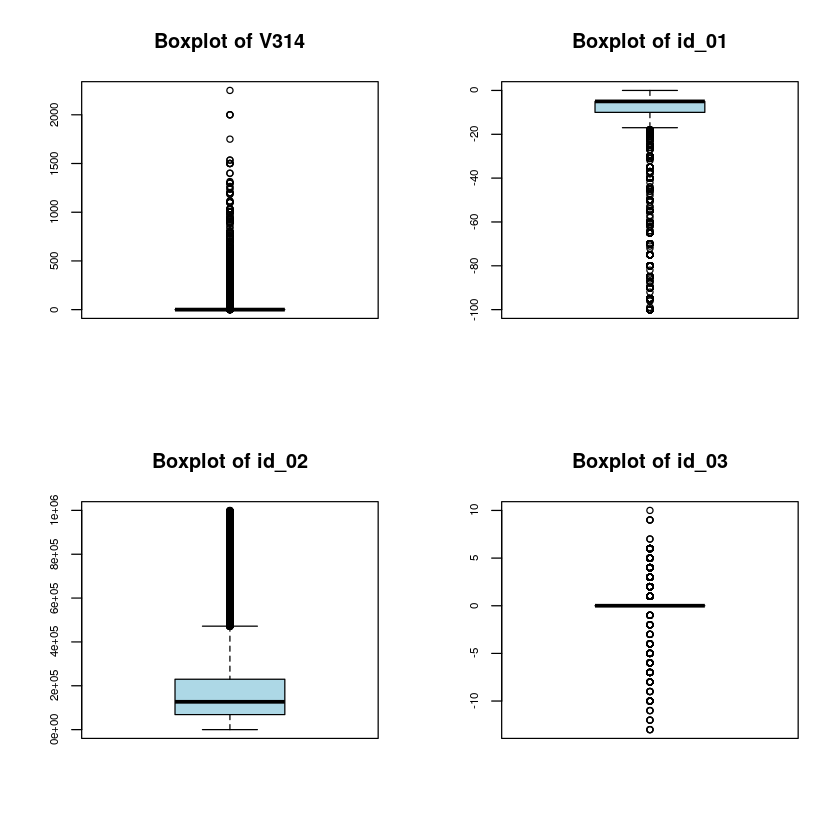

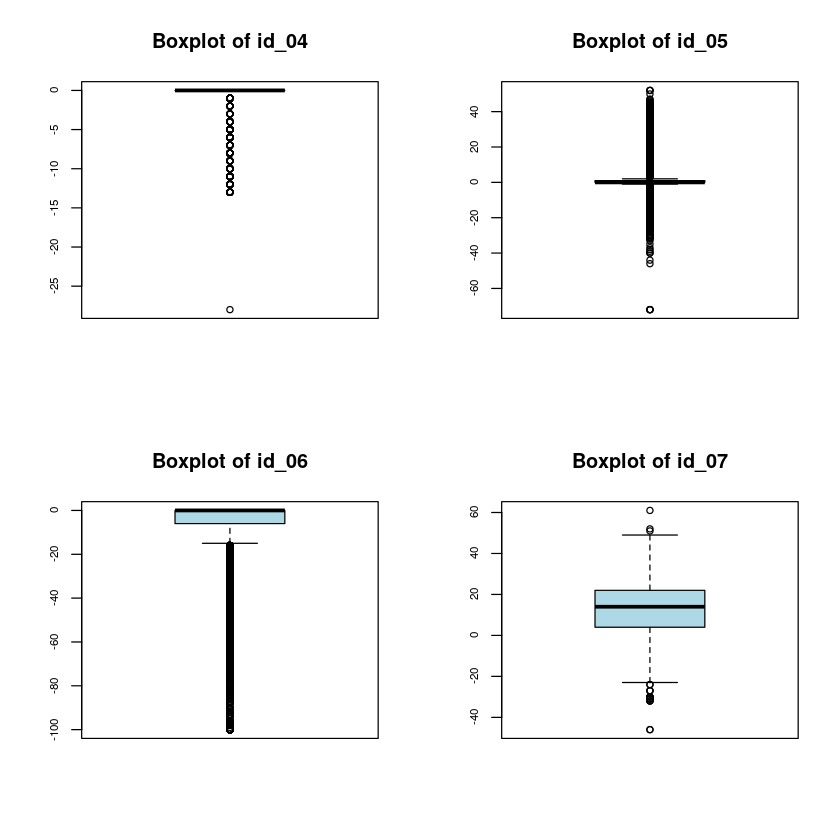

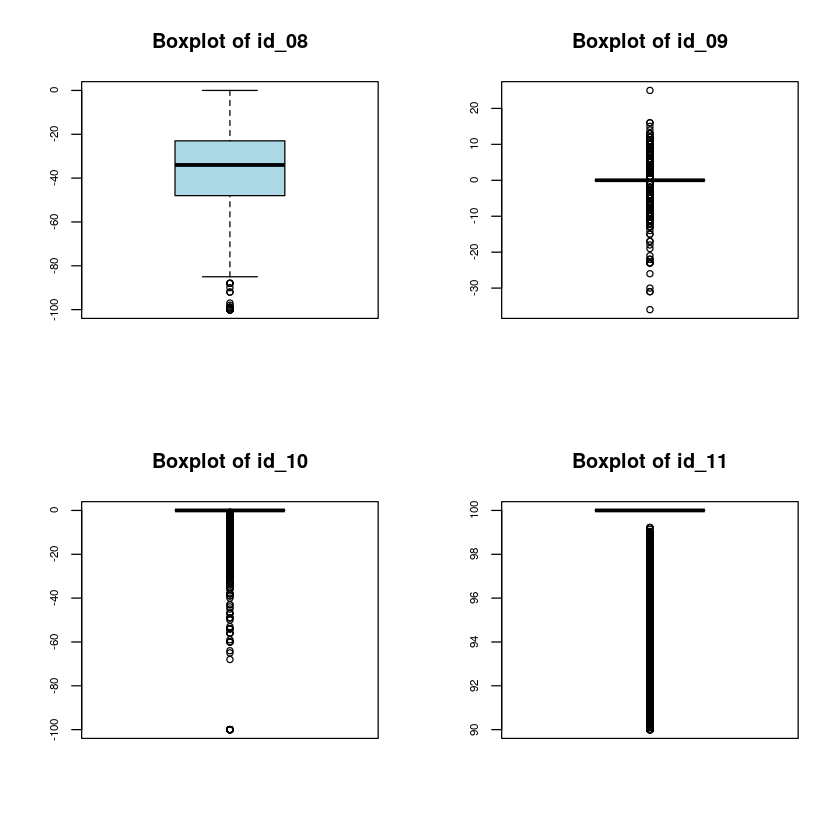

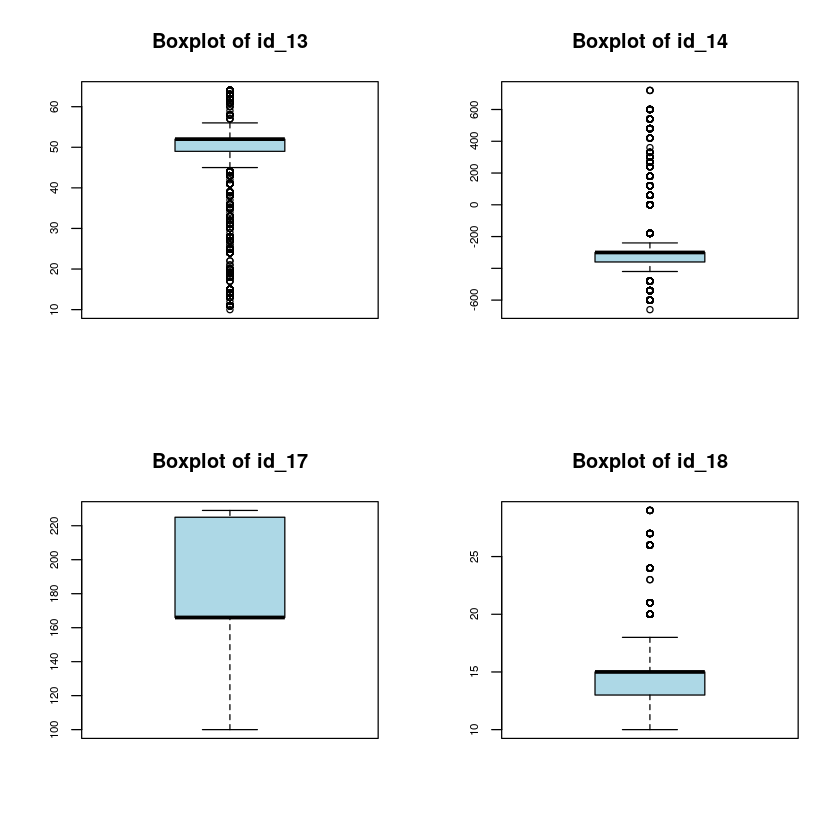

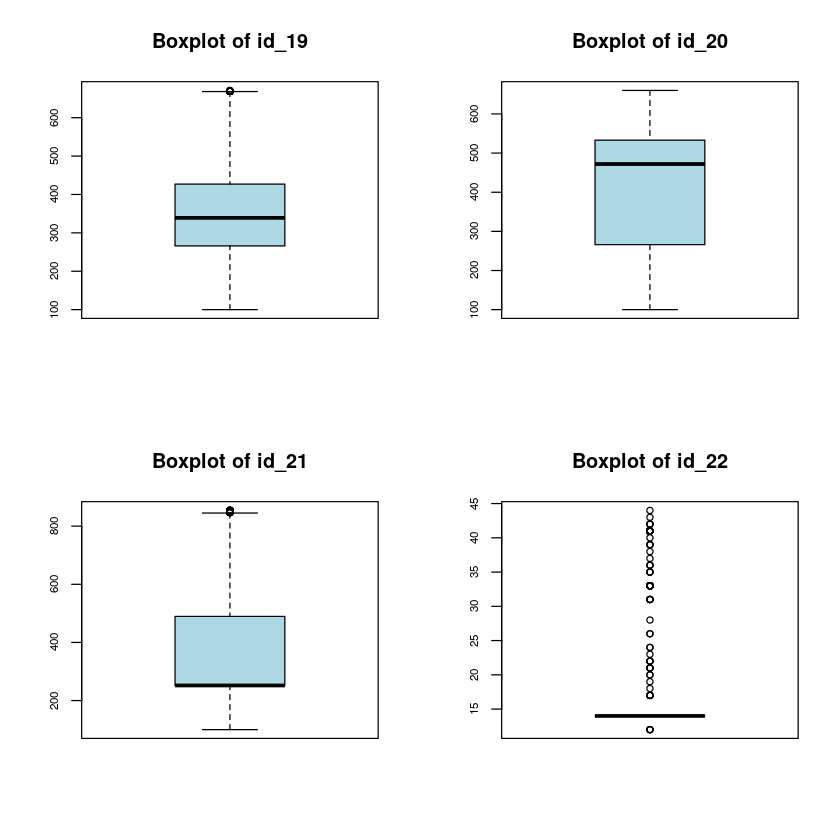

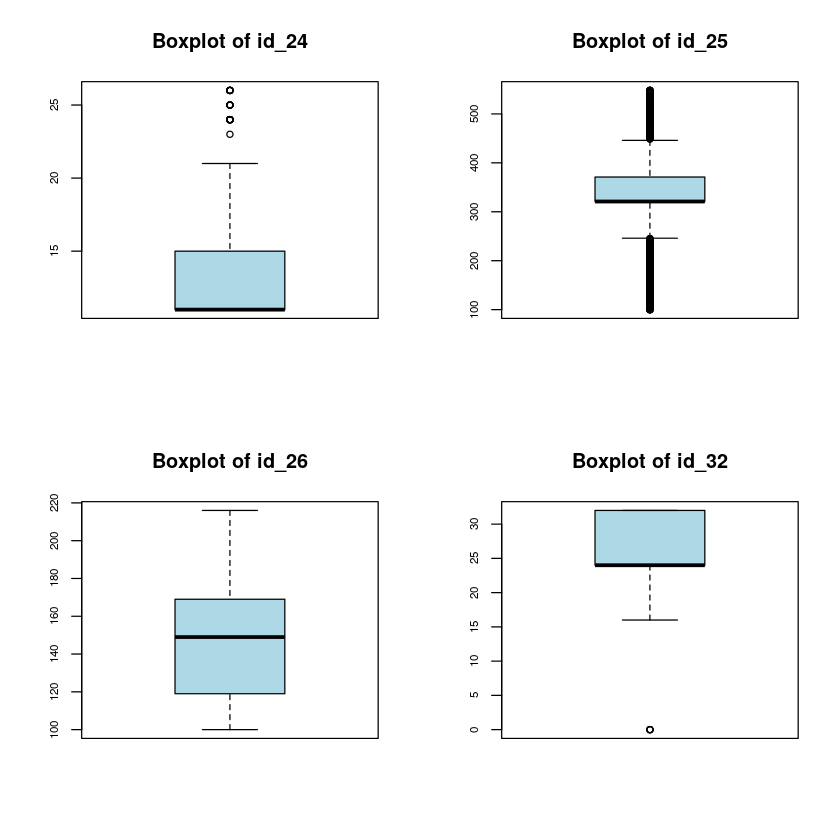

In [82]:
# visualize the distribution of columns with numeric variables by separate boxplot
numeric_cols <- sapply(data, is.numeric)
numeric_data <- data[, numeric_cols]
par(mfrow = c(2,2))
for (col in colnames(numeric_data)) {
  boxplot(numeric_data[[col]], main = paste("Boxplot of", col), col = "lightblue", cex.axis = 0.7)
}



     0      1 
88.682 11.318 

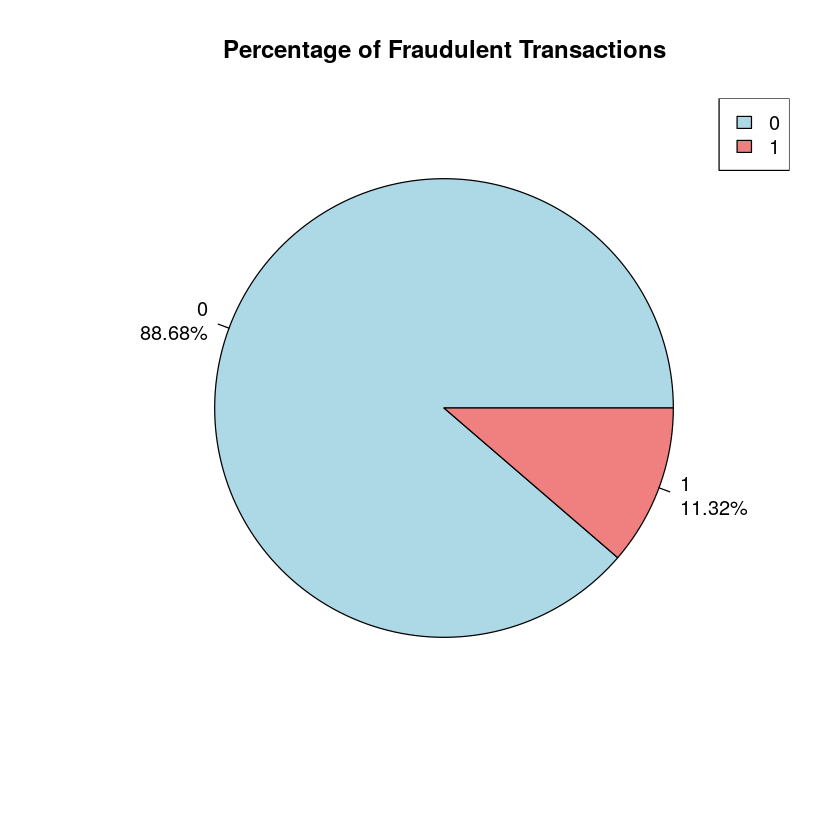

In [44]:
# view the percentage of isFraud in the dataset --------------------------------------
table(data$isFraud) / nrow(data) * 100

# visualize percentage of is fraud in piechart with lengend and percentage labels
isFraud_counts <- table(data$isFraud)
isFraud_labels <- paste(names(isFraud_counts), "\n", round((isFraud_counts / sum(isFraud_counts)) * 100, 2), "%", sep = "")
pie(isFraud_counts, labels = isFraud_labels, main = "Percentage of Fraudulent Transactions", col = c("lightblue", "lightcoral"))
legend("topright", legend = names(isFraud_counts), fill = c("lightblue", "lightcoral"))
  

               Metric        Column Percentage
1  Missing Values (%)         addr1     42.881
2  Missing Values (%)         addr2     42.881
3  Missing Values (%)         dist2     73.694
4  Missing Values (%)         card2      0.688
5  Missing Values (%)         card3      0.115
6  Missing Values (%)         card5      0.660
7  Missing Values (%)            D1      0.155
8  Missing Values (%)            D2     78.733
9  Missing Values (%)            D3     79.692
10 Missing Values (%)            D4     54.271
11 Missing Values (%)            D5     76.124
12 Missing Values (%)            D6     52.588
13 Missing Values (%)            D7     74.148
14 Missing Values (%)            D8     47.606
15 Missing Values (%)            D9     47.606
16 Missing Values (%)           D10     51.253
17 Missing Values (%)           D12     58.199
18 Missing Values (%)           D13     56.376
19 Missing Values (%)           D14     56.054
20 Missing Values (%)           D15     51.915
21 Missing Va

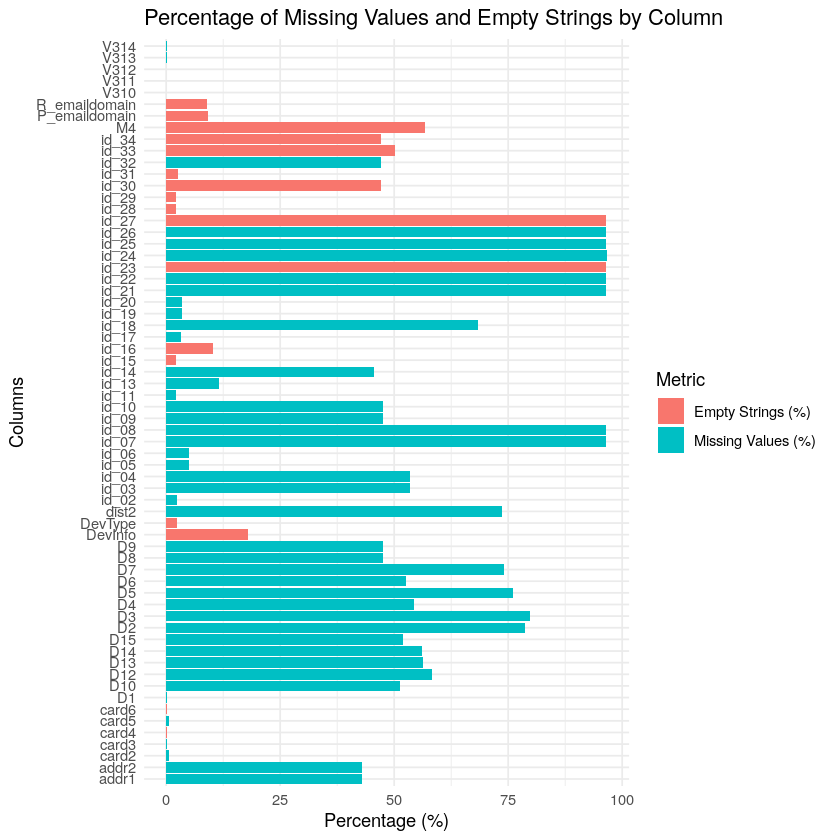

In [45]:
# View the percentage of missing values in column with numeric value ----------------------------
numeric_cols <- sapply(data, is.numeric)
missing_percentage <- sapply(data[, numeric_cols], function(x) {
  sum(is.na(x)) / length(x) * 100
})
missing_percentage <- data.frame(missing_percentage[missing_percentage > 0])

# View the percentage of the value = "" in the column with character value ----------------------------
char_cols <- sapply(data, is.character)
empty_string_percentage <- sapply(data[, char_cols], function(x) {
  sum(x == "", na.rm = TRUE) / length(x) * 100
})
empty_string_percentage <- data.frame(empty_string_percentage[empty_string_percentage > 0])

# Fix: Ensure both data frames have the same column structure
missing_data_summary <- data.frame()

# Add missing values data if any exist
if(nrow(missing_percentage) > 0) {
  missing_df <- data.frame(
    Metric = "Missing Values (%)",
    Column = rownames(missing_percentage),
    Percentage = missing_percentage[,1]
  )
  missing_data_summary <- rbind(missing_data_summary, missing_df)
}

# Add empty strings data if any exist
if(nrow(empty_string_percentage) > 0) {
  empty_df <- data.frame(
    Metric = "Empty Strings (%)",
    Column = rownames(empty_string_percentage),
    Percentage = empty_string_percentage[,1]
  )
  missing_data_summary <- rbind(missing_data_summary, empty_df)
}

# Set proper row names
rownames(missing_data_summary) <- NULL
print(missing_data_summary)

# visualize the percentage of missing values and empty strings in a bar chart
if(nrow(missing_data_summary) > 0) {
  ggplot(missing_data_summary, aes(x = Column, y = Percentage, fill = Metric)) +
    geom_bar(stat = "identity", position = "dodge") +
    coord_flip() +
    labs(title = "Percentage of Missing Values and Empty Strings by Column",
         x = "Columns", y = "Percentage (%)") +
    theme_minimal()
}

In [46]:
# Select the column with the percentage of missing values is less than 50% ----------------------------
cols_to_keep <- setdiff(names(data), missing_data_summary$Column[missing_data_summary$Percentage > 50])
data <- data[, cols_to_keep]
data


TxnID,isFraud,TxnDT,TxnDTHour,TxnAmt,ProductCD,addr1,addr2,dist1,card1,⋯,id_30,id_31,id_32,id_34,id_35,id_36,id_37,id_38,DevType,DevInfo
<int>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<lgl>,<int>,⋯,<chr>,<chr>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
2987004,0,86506,24,82.90000,TP,402,73,NA,4497,⋯,Android,samsung browser 6.2,32,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,SAMSUNG SM-G892A Build/NRD90M
2987011,0,86555,24,27.28170,LY,NA,NA,NA,4461,⋯,,chrome 62.0,NA,,FALSE,FALSE,TRUE,TRUE,desktop,
2987016,0,86620,24,49.70000,TP,152,73,NA,1790,⋯,Mac,chrome 62.0,24,match_status:2,TRUE,FALSE,TRUE,TRUE,desktop,MacOS
2987022,0,86786,24,82.90000,TP,281,73,NA,1724,⋯,,,NA,,NA,NA,NA,NA,,
2987038,0,87172,24,41.40000,AD,312,73,NA,5463,⋯,Android,chrome 62.0,32,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,
2987040,0,87209,24,125.87242,LY,NA,NA,NA,13329,⋯,,chrome 62.0,NA,,FALSE,FALSE,TRUE,TRUE,desktop,Windows
2987048,0,87317,24,70.10804,LY,NA,NA,NA,15885,⋯,,chrome 62.0,NA,,FALSE,FALSE,TRUE,TRUE,desktop,Windows
2987057,0,87445,24,82.90000,TP,186,73,NA,11839,⋯,Android,chrome 62.0 for android,32,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,SM-G930V Build/NRD90M
2987069,0,87725,24,33.10000,AD,312,73,NA,12866,⋯,Linux,chrome 62.0,32,match_status:2,TRUE,FALSE,TRUE,TRUE,desktop,


                   Variable Unique_Values
TxnID                 TxnID        100000
isFraud             isFraud             2
TxnDT                 TxnDT         99292
TxnDTHour         TxnDTHour          4193
TxnAmt               TxnAmt          6803
ProductCD         ProductCD             4
addr1                 addr1           221
addr2                 addr2            68
dist1                 dist1             1
card1                 card1          7337
card2                 card2           473
card3                 card3            96
card4                 card4             5
card5                 card5           100
card6                 card6             4
P_emaildomain P_emaildomain            10
R_emaildomain R_emaildomain            10
C1                       C1          1291
C2                       C2          1060
C3                       C3            18
C4                       C4           960
C5                       C5             1
C6                       C6       

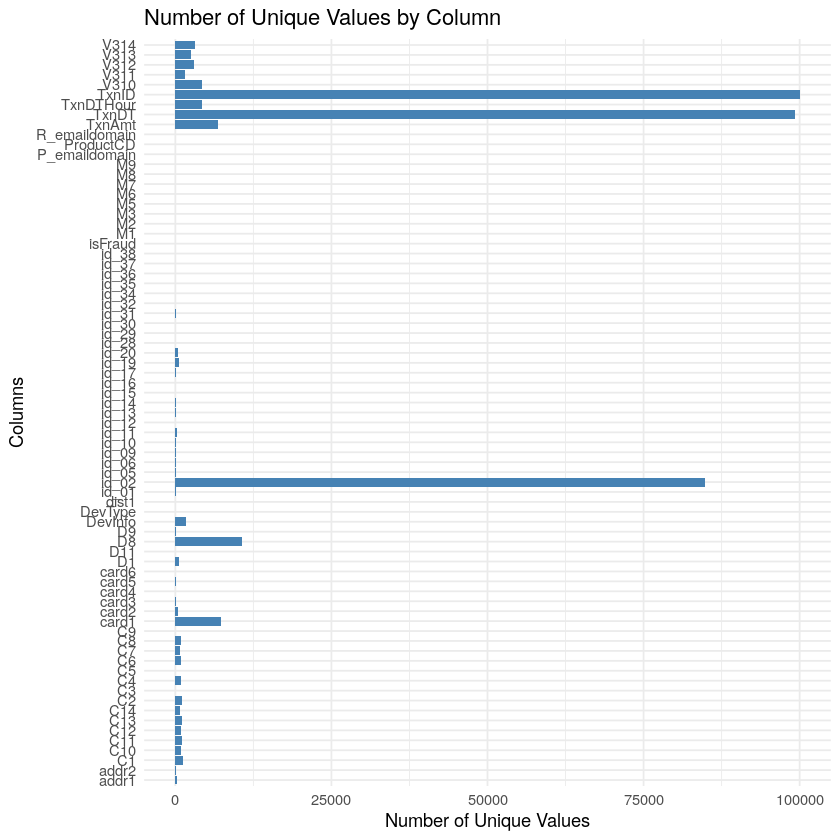

In [47]:
# view the unique values in each column ----------------------------------------------
unique_values <- sapply(data, function(x) length(unique(x)))
unique_values <- data.frame(Variable = names(unique_values), Unique_Values = unique_values)
print(unique_values)

# visualize the unique values in each column with bar chart ----------------------------
# visualize the unique values in each column with bar chart
if(nrow(unique_values) >  0) {
  ggplot(unique_values, aes(x = Variable, y = Unique_Values)) +
    geom_bar(stat = "identity", fill = "steelblue") +
    coord_flip() +
    labs(title = "Number of Unique Values by Column",
         x = "Columns", y = "Number of Unique Values") +
    theme_minimal()
}

In [48]:
# transform the data in columns with character value == "" to "unknown" ----------------------------
data[data == ""] <- "unknown"

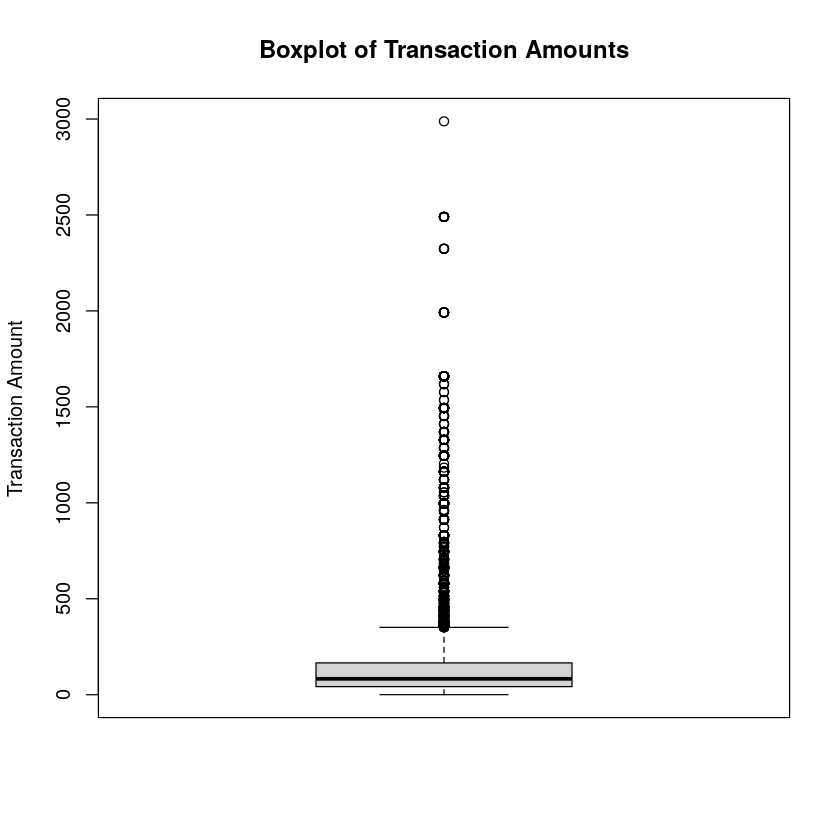

In [49]:
# visualize the TxnAmt distibution by boxplot 
# --- IGNORE ---
boxplot(data$TxnAmt, main = "Boxplot of Transaction Amounts", ylab = "Transaction Amount")
# --- IGNORE ---

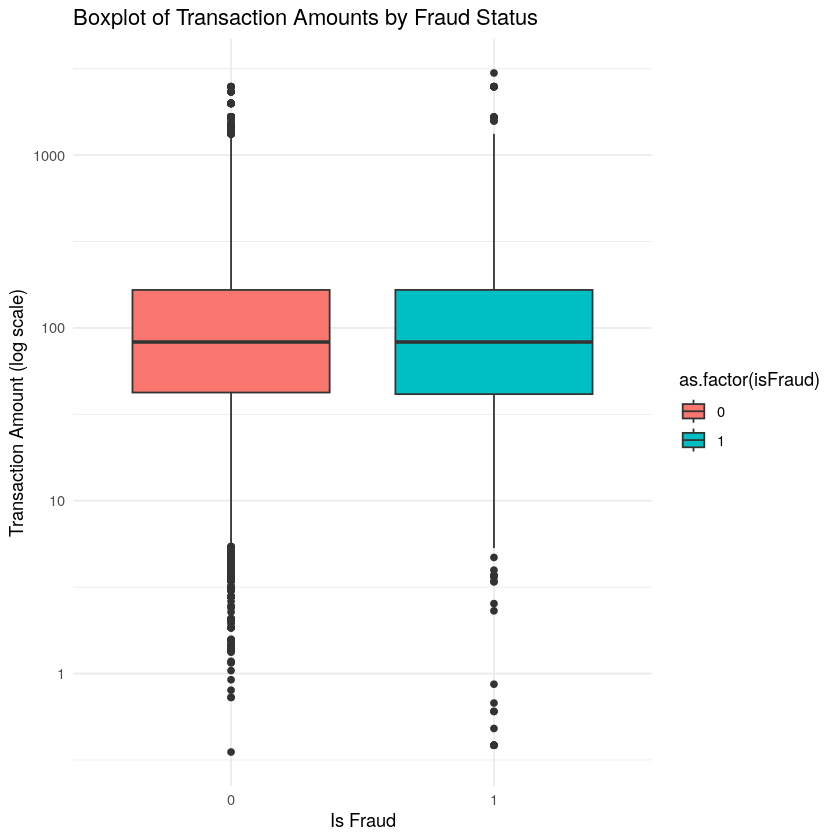

In [50]:
# visuaqlize the TxnAmt and isFraud with boxplot ----------------------------
# --- IGNORE ---
ggplot(data, aes(x = as.factor(isFraud), y = TxnAmt, fill = as.factor(isFraud))) +
  geom_boxplot() +
  scale_y_log10() +  # Log scale for better visualization
  labs(title = "Boxplot of Transaction Amounts by Fraud Status",
       x = "Is Fraud", y = "Transaction Amount (log scale)") +
  theme_minimal()
# --- IGNORE ---

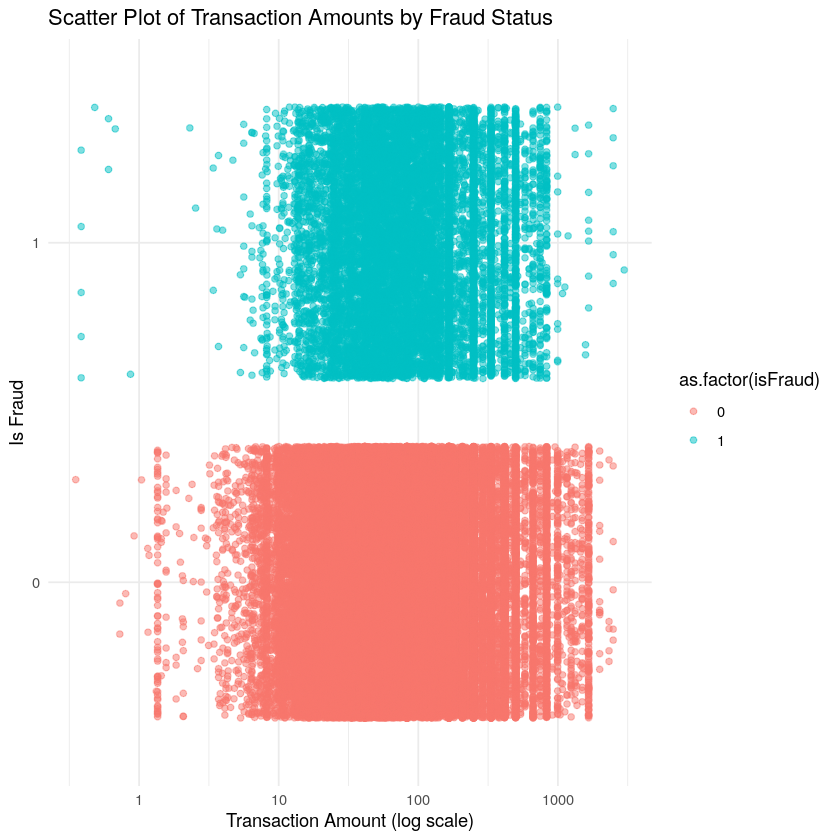

In [51]:
# Visualize the correlation of TxnAmt with isFraud by scatter plot ----------------------------
# --- IGNORE ---
ggplot(data, aes(x = TxnAmt, y = as.factor(isFraud), color = as.factor(isFraud))) +
  geom_jitter(alpha = 0.5) +
  scale_x_log10() +  # Log scale for better visualization
  labs(title = "Scatter Plot of Transaction Amounts by Fraud Status",
       x = "Transaction Amount (log scale)", y = "Is Fraud") +  
  theme_minimal()

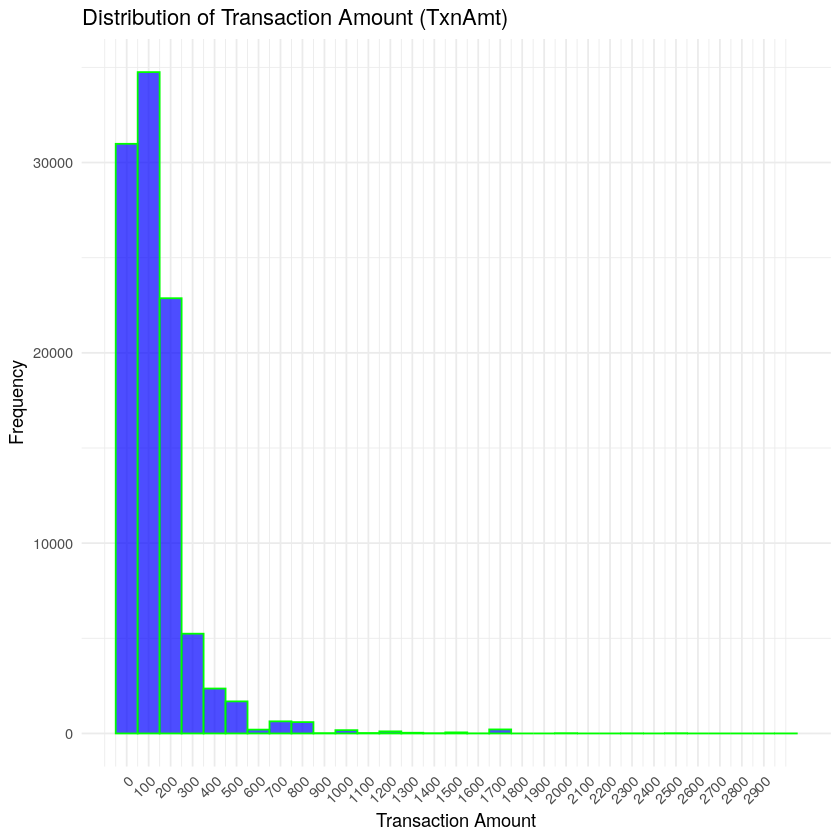

In [52]:
# view the distribution of TxnAmt ------------------------------------------------
ggplot(data, aes(x = TxnAmt)) +
  geom_histogram(binwidth = 100, fill = "blue", color = "green", alpha = 0.7) +
  labs(title = "Distribution of Transaction Amount (TxnAmt)", x = "Transaction Amount", y = "Frequency") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$TxnAmt, na.rm = TRUE), by = 100)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

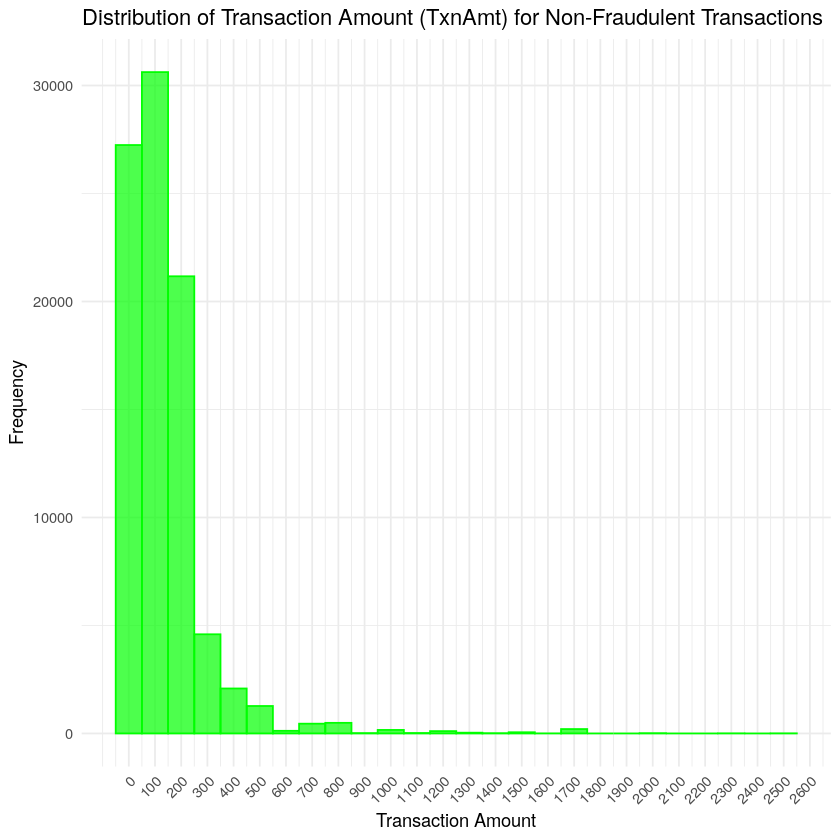

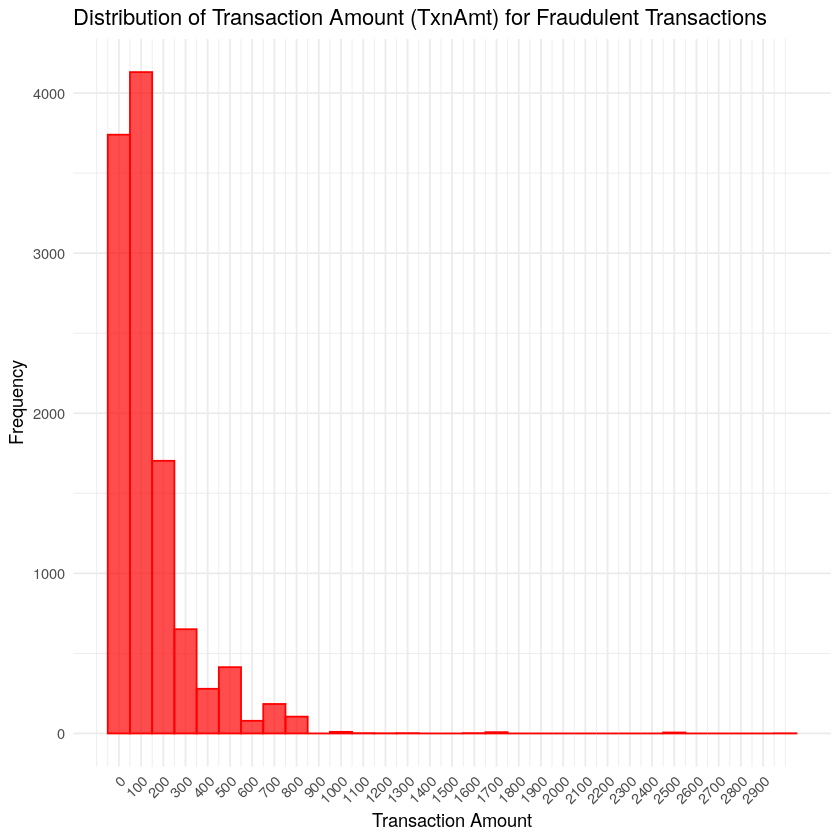

In [53]:
# view the distribution of TxnAmt group by isFraud == 0 and x tick size = 100 and font direction is diagonal--------------------------------------------------
ggplot(data %>% filter(isFraud == 0), aes(x = TxnAmt)) +
  geom_histogram(binwidth = 100, fill="green", color = "green", alpha = 0.7) +
  labs(title = "Distribution of Transaction Amount (TxnAmt) for Non-Fraudulent Transactions", x = "Transaction Amount", y = "Frequency") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$TxnAmt, na.rm = TRUE), by = 100)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

  # view the distribution of TxnAmt group by isFraud == 1 and x tick size = 100 and font direction is diagonal-------------------------------------------------
ggplot(data %>% filter(isFraud == 1), aes(x = TxnAmt)) +
  geom_histogram(binwidth = 100, fill="red", color = "red", alpha = 0.7) +
  labs(title = "Distribution of Transaction Amount (TxnAmt) for Fraudulent Transactions", x = "Transaction Amount", y = "Frequency") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$TxnAmt, na.rm = TRUE), by = 100)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


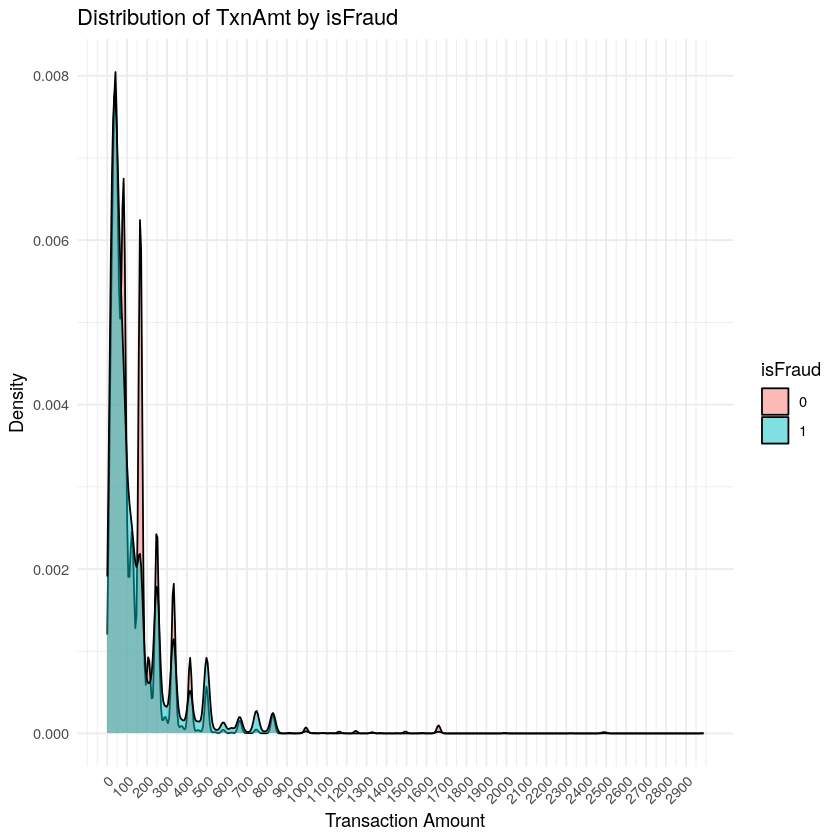

In [54]:
# view the distribution of TxnAmt group by isFraud == 0 and isFraud == 1 and bandwidth = 100 ------------------------------------------------
library(ggplot2)
ggplot(data, aes(x = TxnAmt, fill = factor(isFraud))) +
  geom_density(alpha = 0.5) +
  labs(title = "Distribution of TxnAmt by isFraud",
       x = "Transaction Amount",
       y = "Density",
       fill = "isFraud") +
  theme_minimal()  +
  scale_x_continuous(breaks = seq(0, max(data$TxnAmt, na.rm = TRUE), by = 100)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

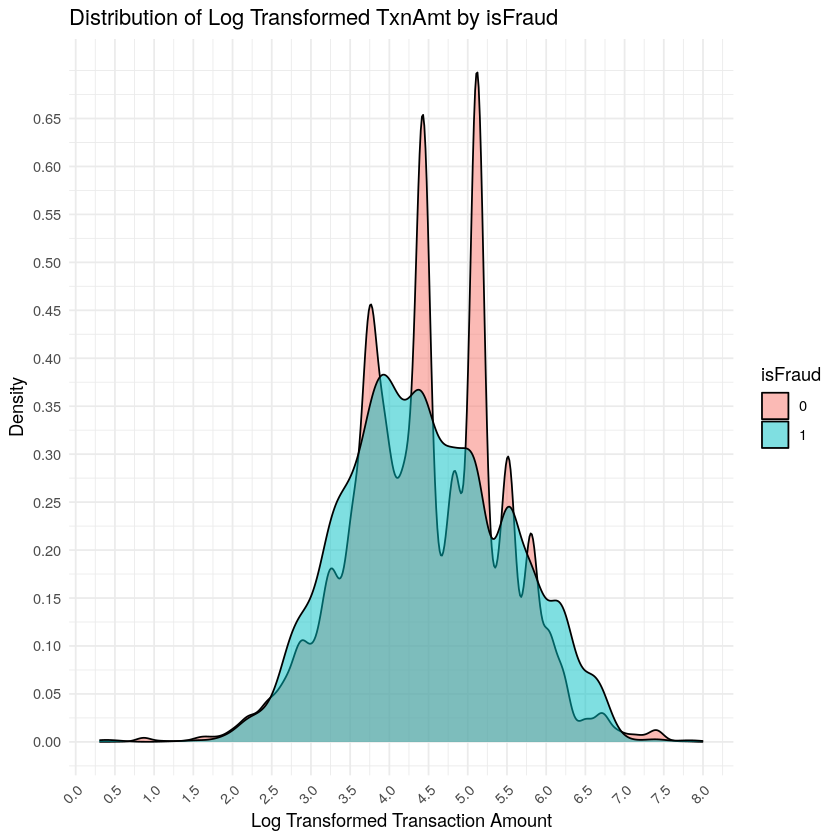

In [55]:
# view the log transformation of TxnAmt and y tick size = 0.05 and  x tick size = 0.5 ------------------------------------------------
data <- data %>% mutate(Log_TxnAmt = log(TxnAmt + 1))  # Adding 1 to avoid log(0) 

ggplot(data, aes(x = Log_TxnAmt, fill = factor(isFraud))) +
  geom_density(alpha = 0.5) +
  labs(title = "Distribution of Log Transformed TxnAmt by isFraud",
       x = "Log Transformed Transaction Amount", 
       y = "Density",
       fill = "isFraud") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$Log_TxnAmt, na.rm = TRUE), by = 0.5)) +     
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  +
  scale_y_continuous(breaks = seq(0, max(ggplot_build(ggplot(data, aes(x = Log_TxnAmt, fill = factor(isFraud))) +
  geom_density(alpha = 0.5))$data[[1]]$density, na.rm = TRUE), by = 0.05))

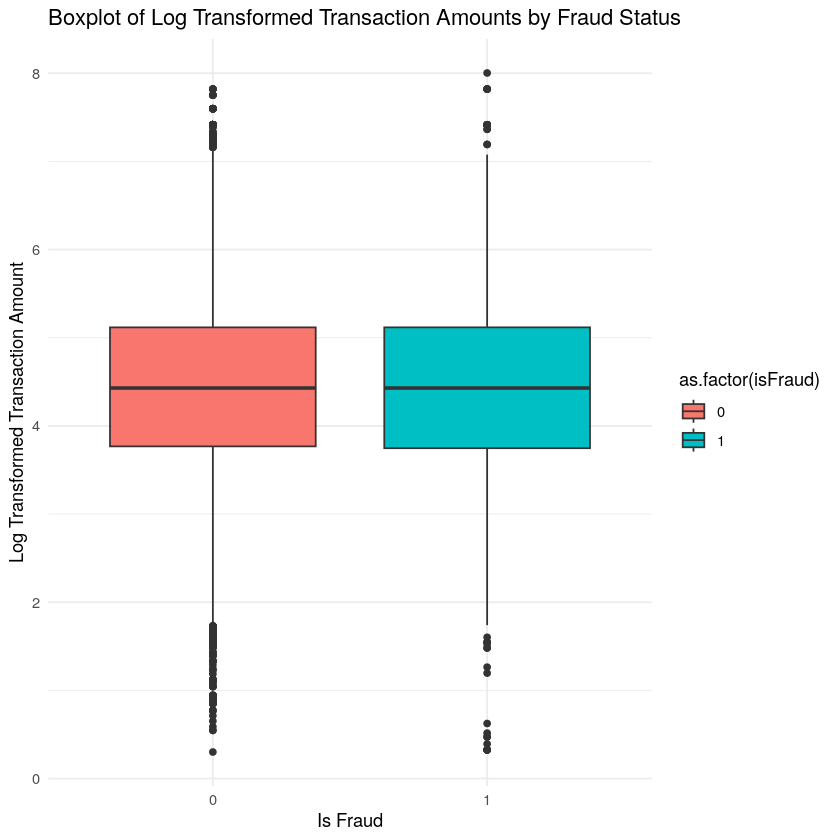

In [56]:
# view the log transformation of TxnAmt group by isFraud == 0 and isFraud == 1 thru boxplot ------------------------------------------------
# --- IGNORE ---
ggplot(data, aes(x = as.factor(isFraud), y = Log_TxnAmt, fill = as.factor(isFraud))) +
  geom_boxplot() +
  labs(title = "Boxplot of Log Transformed Transaction Amounts by Fraud Status",
       x = "Is Fraud", y = "Log Transformed Transaction Amount") +
  theme_minimal()
# --- IGNORE ---

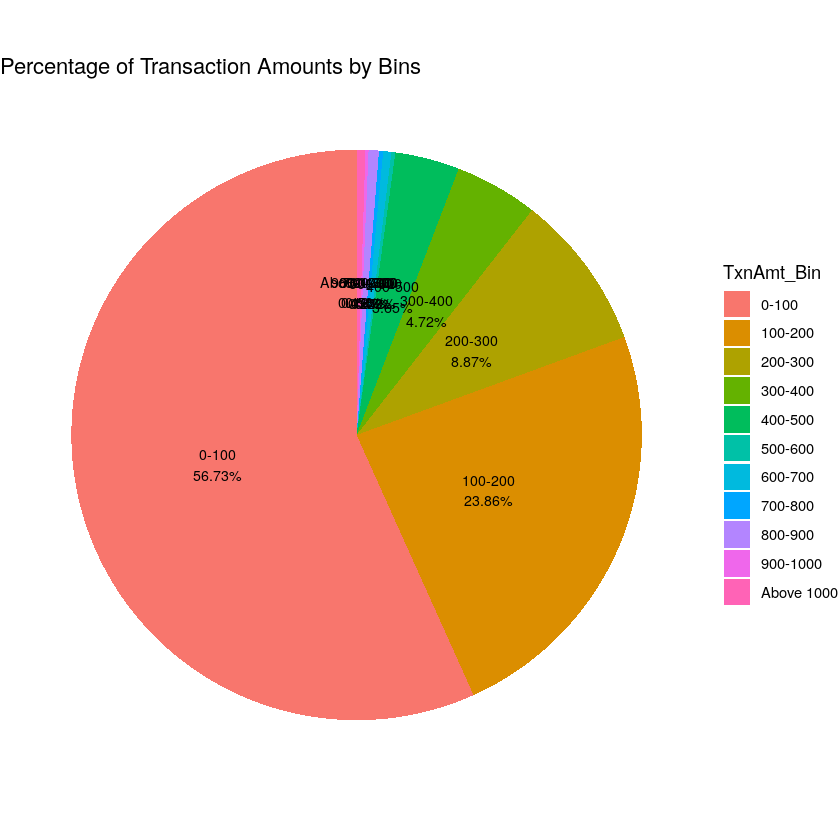

In [57]:
# view the percentage of TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000  -----------------------------------------------    
original_data <- data

data <- data %>%
  mutate(TxnAmt_Bin = case_when(
    TxnAmt <= 100 ~ "0-100",
    TxnAmt <= 200 ~ "100-200",
    TxnAmt <= 300 ~ "200-300",
    TxnAmt <= 400 ~ "300-400",
    TxnAmt <= 500 ~ "400-500",
    TxnAmt <= 600 ~ "500-600",
    TxnAmt <= 700 ~ "600-700",
    TxnAmt <= 800 ~ "700-800",
    TxnAmt <= 900 ~ "800-900",
    TxnAmt <= 1000 ~ "900-1000",
    TRUE ~ "Above 1000"
  )) %>%
  group_by(TxnAmt_Bin) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100)

  # visualize the percentage of TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 
  # 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 by pie chart 
  # with percentage label outside pie slices -----------------------------------------------
  data <- data %>%  arrange(TxnAmt_Bin)  # Ensure bins are in the correct order
data$Label <- paste(data$TxnAmt_Bin, "\n", round(data$Percentage, 2), "%", sep = "")
ggplot(data, aes(x = "", y = Percentage, fill = TxnAmt_Bin)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  geom_text(aes(label = Label), position = position_stack(vjust = 0.5), size = 3) +
  labs(title = "Percentage of Transaction Amounts by Bins") +
  theme_void()

  # Restore original data for next analysis
data <- original_data

`summarise()` has grouped output by 'TxnAmt_Bin'. You can override using the
`.groups` argument.


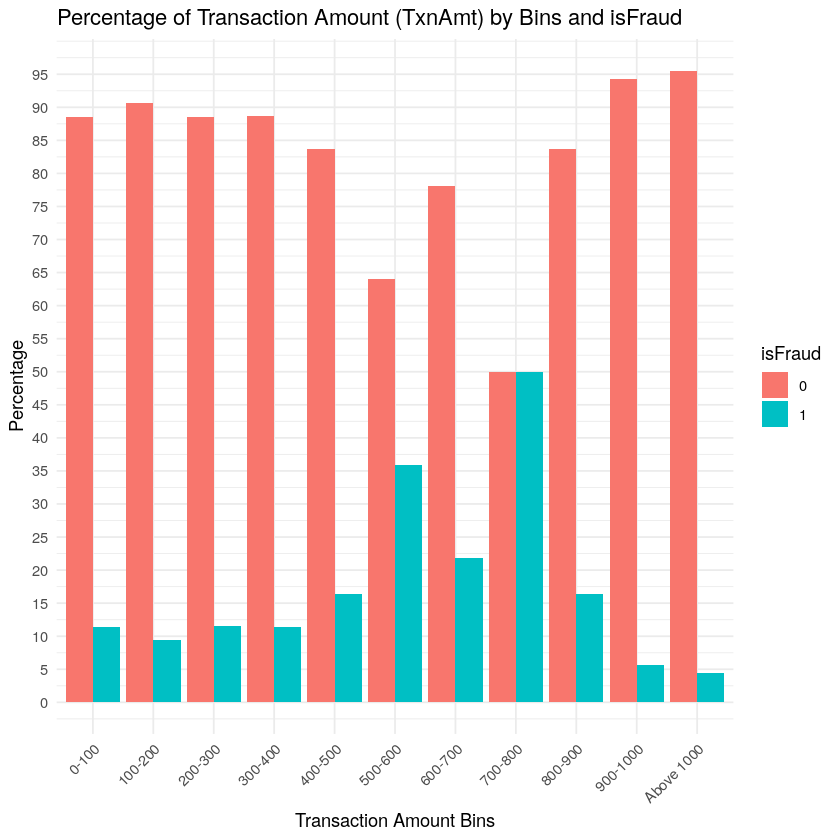

In [59]:
# view TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 group by isFraud and non-fraud ------------------------------------------------
original_data <- data
data <- data %>%
  mutate(TxnAmt_Bin = case_when(
    TxnAmt <= 100 ~ "0-100",
    TxnAmt <= 200 ~ "100-200",
    TxnAmt <= 300 ~ "200-300",
    TxnAmt <= 400 ~ "300-400",
    TxnAmt <= 500 ~ "400-500",
    TxnAmt <= 600 ~ "500-600",
    TxnAmt <= 700 ~ "600-700",
    TxnAmt <= 800 ~ "700-800",
    TxnAmt <= 900 ~ "800-900",
    TxnAmt <= 1000 ~ "900-1000",
    TRUE ~ "Above 1000"
  )) %>%
  group_by(TxnAmt_Bin, isFraud) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100)

# visualize TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 group by isFraud and non-fraud -----------------------------------------------
ggplot(data, aes(x = TxnAmt_Bin, y = Percentage, fill = factor(isFraud))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Percentage of Transaction Amount (TxnAmt) by Bins and isFraud", 
       x = "Transaction Amount Bins", 
       y = "Percentage",
       fill = "isFraud") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, max(data$Percentage, na.rm = TRUE), by = 5))

  # Restore original data for next analysis
data <- original_data

In [60]:
# Convert TxnDT to DateTime format and extract useful features ----------------------------
data <- data %>% mutate(TxnDT = as.POSIXct(TxnDT, origin = "1970-01-01", tz = "UTC"))
data <- data %>% mutate(TransactionHour = as.numeric(format(TxnDT, "%H")),
                        TransactionDay = as.numeric(format(TxnDT, "%d")),
                        TransactionMonth = as.numeric(format(TxnDT, "%m")),
                        TransactionWeekday = as.numeric(format(TxnDT, "%u")))  # 1 = Monday, 7 = Sunday    

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


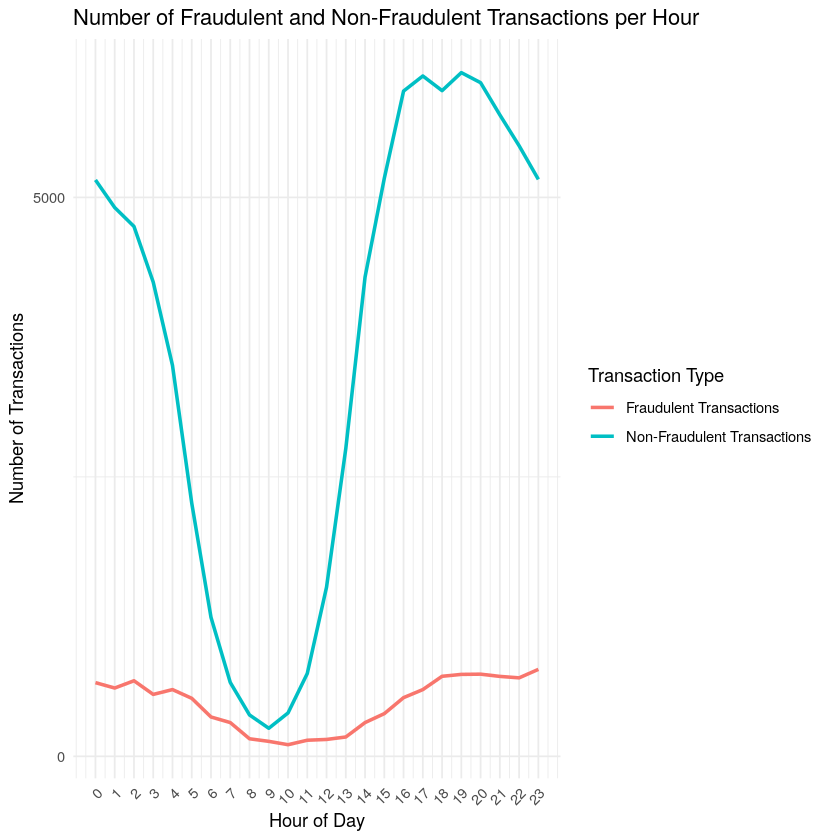

In [61]:
# count the number of transactions per hour ----------------------------------------------
transactions_per_hour <- data %>% group_by(TransactionHour) %>%
  summarise(Count = n())

# count the number of isFraud and non-fraud per hour ---------------------------------------------- 
fraud_per_hour <- data %>% group_by(TransactionHour) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud))

# visualize the number of isFraud and non-fraud per hour ----------------------------------------------
ggplot(fraud_per_hour, aes(x = TransactionHour)) +
  geom_line(aes(y = FraudCount, color = "Fraudulent Transactions"), size = 1) +
  geom_line(aes(y = NonFraudCount, color = "Non-Fraudulent Transactions"), size = 1) +
  labs(title = "Number of Fraudulent and Non-Fraudulent Transactions per Hour",
       x = "Hour of Day",
       y = "Number of Transactions",
       color = "Transaction Type") +
  theme_minimal() +
  scale_x_continuous(breaks = 0:23) +
  scale_y_continuous(breaks = seq(0, max(fraud_per_hour$NonFraudCount, na.rm = TRUE), by = 5000)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

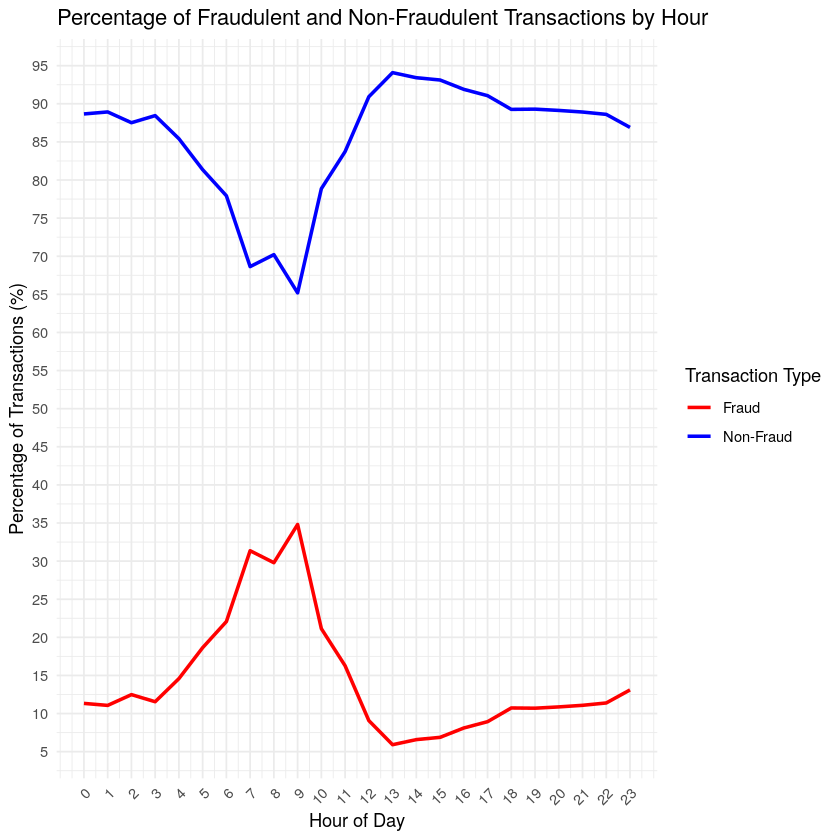

In [62]:
# view the percentage of isFraud and non-fraud by TransactionHour ------------------------------------------------
fraud_non_fraud_percentage_per_hour <- fraud_per_hour %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage = (NonFraudCount / (FraudCount + NonFraudCount)) * 100)

# visualize the percentage of isFraud and non-fraud by TransactionHour ------------------------------------------------
ggplot(fraud_non_fraud_percentage_per_hour, aes(x = TransactionHour)) +
  geom_line(aes(y = FraudPercentage, color = "Fraud"), size = 1) +
  geom_line(aes(y = NonFraudPercentage, color = "Non-Fraud"), size = 1) +
  labs(title = "Percentage of Fraudulent and Non-Fraudulent Transactions by Hour",
       x = "Hour of Day",
       y = "Percentage of Transactions (%)") +
  theme_minimal() +
  scale_x_continuous(breaks = 0:23) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_color_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue"), name = "Transaction Type")

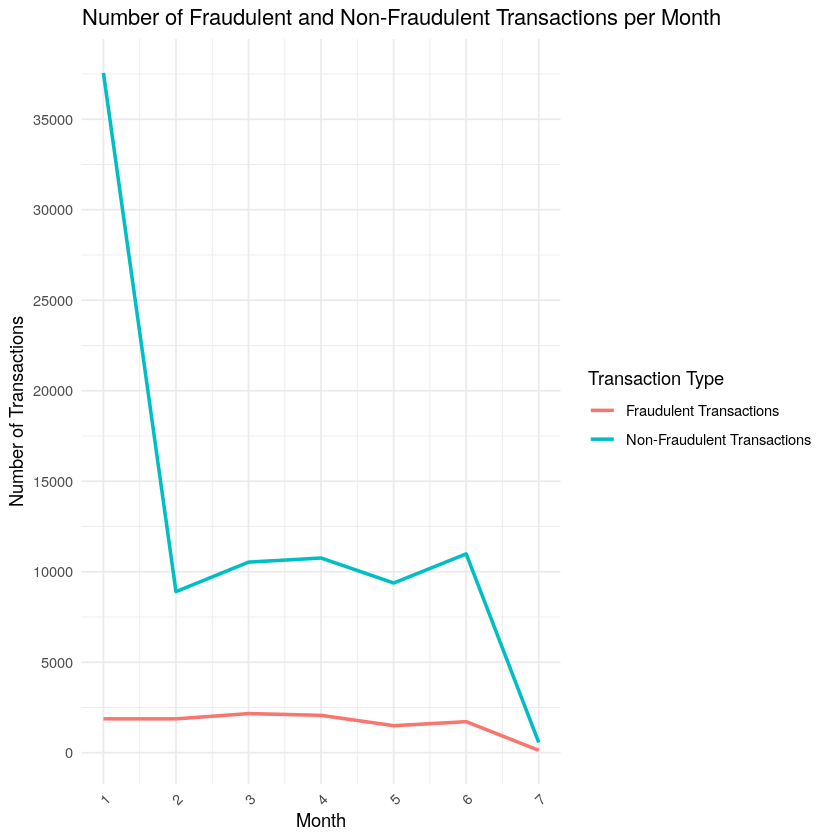

In [63]:
# count the number of transactions per month group by isFraud and Non-Fraud ----------------------------------------------
transactions_per_month <- data %>% group_by(TransactionMonth) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud))

# visualize the number of isFraud and non-fraud per month ----------------------------------------------
ggplot(transactions_per_month, aes(x = TransactionMonth)) +
  geom_line(aes(y = FraudCount, color = "Fraudulent Transactions"), size = 1) +
  geom_line(aes(y = NonFraudCount, color = "Non-Fraudulent Transactions"), size = 1) +
  labs(title = "Number of Fraudulent and Non-Fraudulent Transactions per Month",
       x = "Month",
       y = "Number of Transactions",
       color = "Transaction Type") +
  theme_minimal() +
  scale_x_continuous(breaks = 1:12) +
  scale_y_continuous(breaks = seq(0, max(transactions_per_month$NonFraudCount, na.rm = TRUE), by = 5000)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

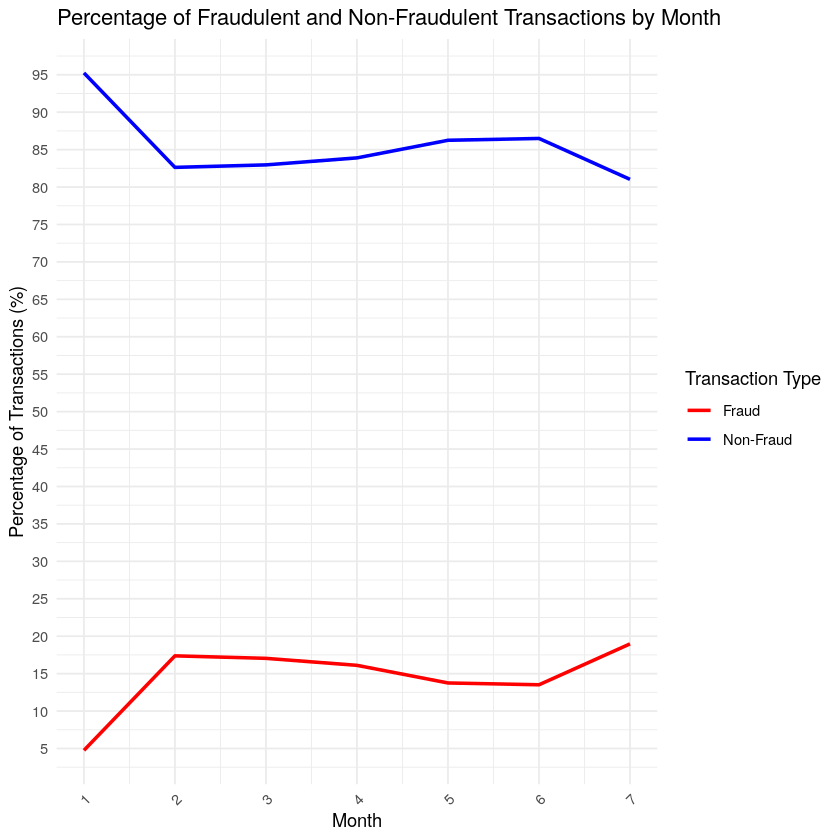

In [64]:
# view the percentage of transactions per month group by isFraud and Non-Fraud ------------------------------------------------
fraud_non_fraud_percentage_per_month <- transactions_per_month %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage = (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
# visualize the percentage of transactions per month group by isFraud and Non-Fraud ------------------------------------------------
ggplot(fraud_non_fraud_percentage_per_month, aes(x = TransactionMonth)) +
  geom_line(aes(y = FraudPercentage, color = "Fraud"), size = 1) +
  geom_line(aes(y = NonFraudPercentage, color = "Non-Fraud"), size = 1) +
  labs(title = "Percentage of Fraudulent and Non-Fraudulent Transactions by Month",
       x = "Month",
       y = "Percentage of Transactions (%)") +
  theme_minimal() +
  scale_x_continuous(breaks = 1:12) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_color_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue"), name = "Transaction Type")

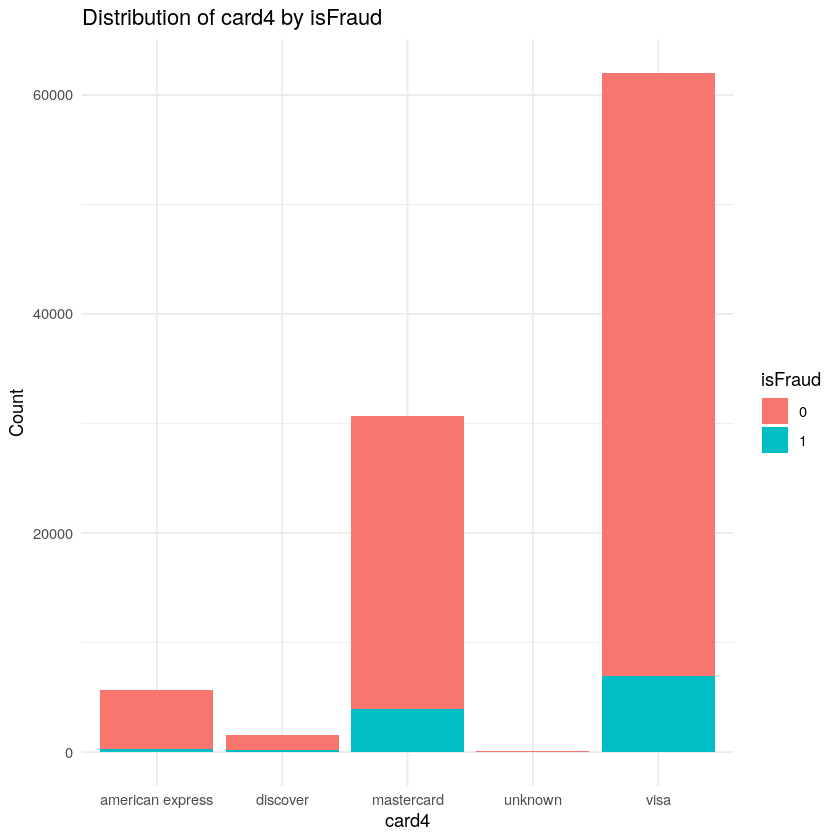

In [65]:
# view the distribution of card4 group by isFraud ------------------------------------------------
ggplot(data, aes(x = card4, fill = factor(isFraud))) +
  geom_bar() +
  labs(title = "Distribution of card4 by isFraud",
       x = "card4",
       y = "Count",
       fill = "isFraud") +
  theme_minimal()

In [66]:
# view the percentage of card4 group by isFraud ------------------------------------------------
card4_fraud_percentage <- data %>%
  group_by(card4) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(card4_fraud_percentage)


# A tibble: 5 × 5
  card4            FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>                 <int>         <int>           <dbl>              <dbl>
1 american express        239          5400            4.24               95.8
2 discover                177          1375           11.4                88.6
3 mastercard             3920         26760           12.8                87.2
4 unknown                  14           109           11.4                88.6
5 visa                   6968         55038           11.2                88.8


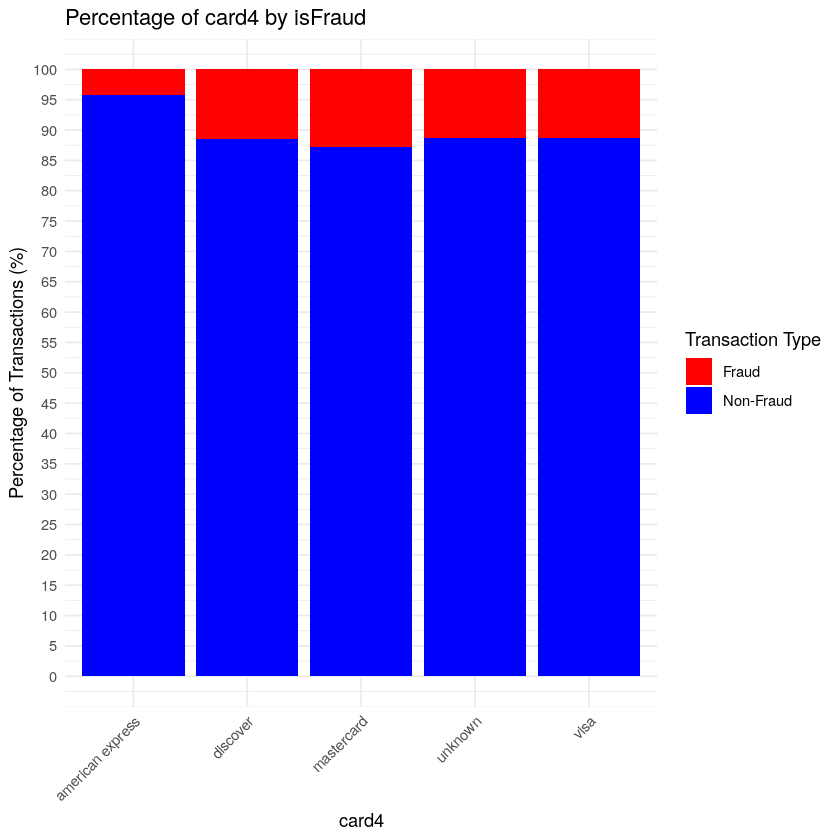

In [67]:
# visualize the percentage of card4 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
card4_plot_data <- card4_fraud_percentage %>%
  select(card4, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))

# Create the plot with proper dodged bars
ggplot(card4_plot_data, aes(x = card4, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of card4 by isFraud",
       x = "card4",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")


# A tibble: 4 × 5
  card6       FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 charge card          0             9            0                 100  
2 credit            6693         45585           12.8                87.2
3 debit             4613         42982            9.69               90.3
4 unknown             12           106           10.2                89.8


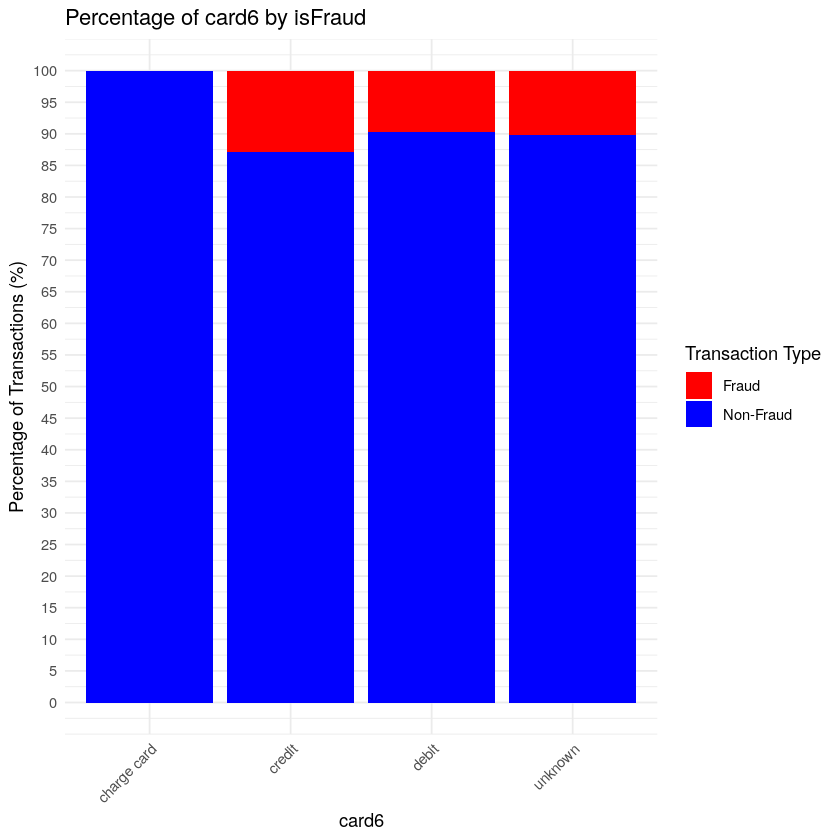

In [68]:
# view the percentage of card6 group by isFraud ------------------------------------------------
card6_fraud_percentage <- data %>%
  group_by(card6) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(card6_fraud_percentage)

# visualize the percentage of card6 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
card6_plot_data <- card6_fraud_percentage %>%
  select(card6, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  )) 

  # Create the plot with proper dodged bars
ggplot(card6_plot_data, aes(x = card6, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of card6 by isFraud",
       x = "card6",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 3 × 5
  DevType FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>        <int>         <int>           <dbl>              <dbl>
1 desktop       5554         53178            9.46               90.5
2 mobile        5657         33296           14.5                85.5
3 unknown        107          2208            4.62               95.4


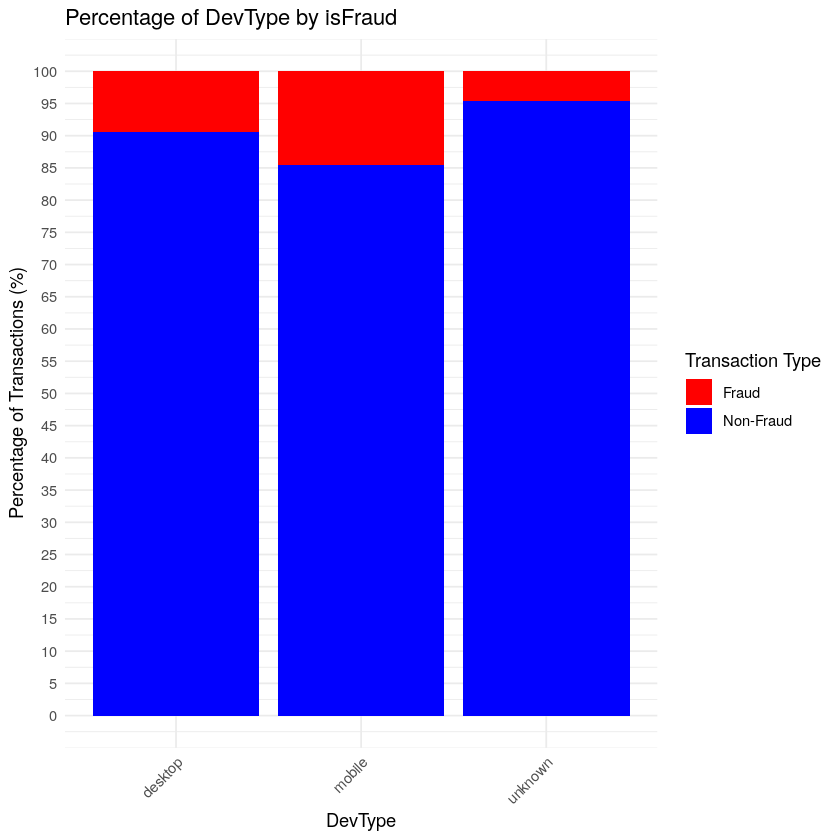

In [69]:
# view the percentage of DevType group by isFraud ------------------------------------------------
devtype_fraud_percentage <- data %>%
  group_by(DevType) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(devtype_fraud_percentage)

# visualize the percentage of DevType group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
devtype_plot_data <- devtype_fraud_percentage %>%
  select(DevType, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))

# Create the plot with proper dodged bars
ggplot(devtype_plot_data, aes(x = DevType, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of DevType by isFraud",
       x = "DevType",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")
       

# A tibble: 4 × 5
  ProductCD FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>          <int>         <int>           <dbl>              <dbl>
1 AD               684          7255            8.62               91.4
2 LY              7640         36492           17.3                82.7
3 TP              1571         20835            7.01               93.0
4 WF              1423         24100            5.58               94.4


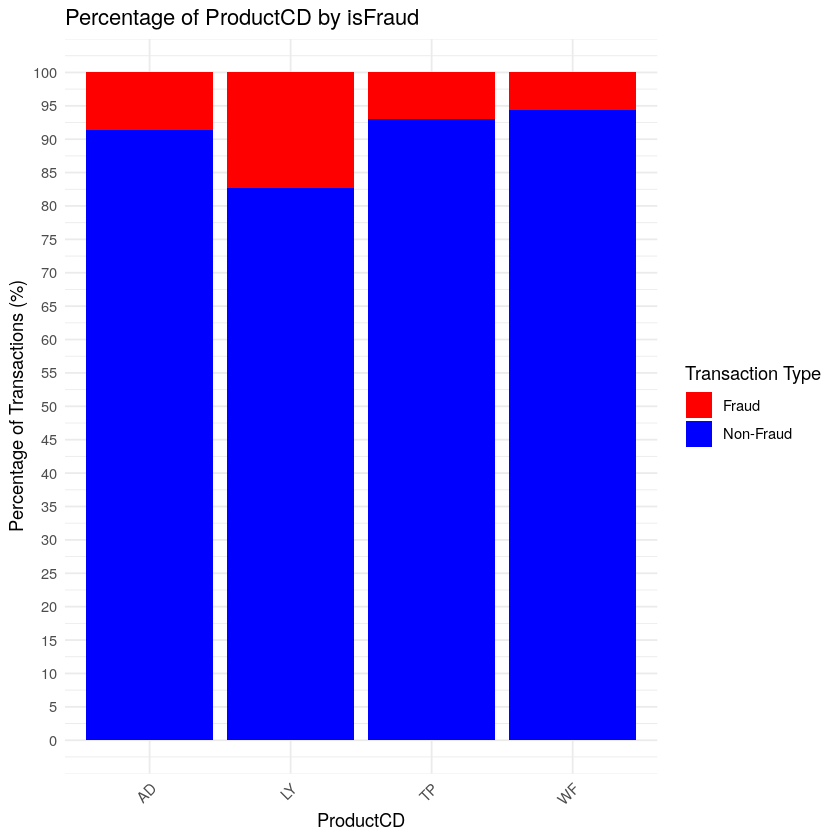

In [70]:
# view the percentage of ProductCD group by isFraud ------------------------------------------------
productcd_fraud_percentage <- data %>%
  group_by(ProductCD) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(productcd_fraud_percentage)   

# visualize the percentage of ProductCD group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
productcd_plot_data <- productcd_fraud_percentage %>%
  select(ProductCD, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(productcd_plot_data, aes(x = ProductCD, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of ProductCD by isFraud",
       x = "ProductCD",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")   

# A tibble: 2 × 5
  addr1_is_na FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 NA                7433         35448           17.3                82.7
2 Not NA            3885         53234            6.80               93.2


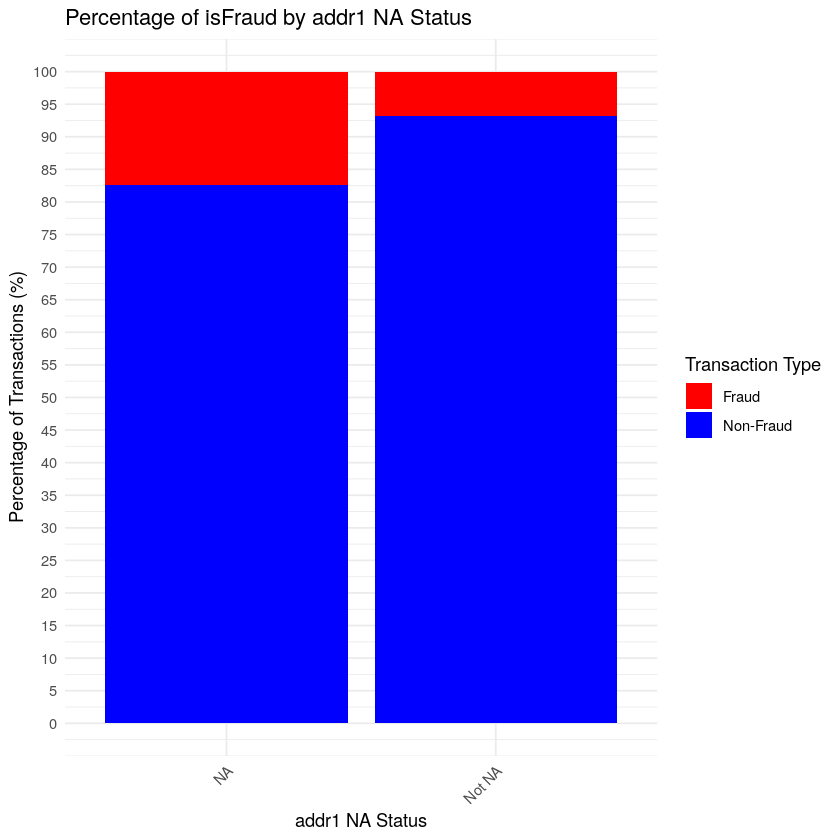

In [71]:
# view the percentage of isFraud by addr1 which is.na and not is.na ------------------------------------------------
addr1_fraud_summary <- data %>%
  mutate(addr1_is_na = ifelse(is.na(addr1), "NA", "Not NA")) %>%
  group_by(addr1_is_na) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage = (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(addr1_fraud_summary)

# visualize the percentage of isFraud by addr1 which is.na and not is.na ------------------------------------------------
# First, reshape the data for better plotting
addr1_plot_data <- addr1_fraud_summary %>%
  select(addr1_is_na, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(addr1_plot_data, aes(x = addr1_is_na, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of isFraud by addr1 NA Status",
       x = "addr1 NA Status",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")


In [72]:
# find the card1 with the record of isFraud == 1 ------------------------------------------------
fraudulent_card1 <- unique(data$card1[data$isFraud == 1])

# view the percentage of isFraud per card1 which is in fraudulent_card1 ------------------------------------------------
card1_fraud_percentage <- data %>%
  filter(card1 %in% fraudulent_card1) %>%
  group_by(card1) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage = (NonFraudCount / (FraudCount + NonFraudCount)) * 100) %>%
  arrange(desc(FraudPercentage))

 # view the average percentage of isFraud per card1 which is in fraudulent_card1 ------------------------------------------------
card1_fraud_percentage <- card1_fraud_percentage %>%
  summarise(Average_FraudPercentage = mean(FraudPercentage),
            Average_NonFraudPercentage = mean(NonFraudPercentage))
print(card1_fraud_percentage)

# view the Average TxnAmt per TransactionMonth where card1 is in fraudulent_card1 and isFraud == 1 ------------------------------------------------
avg_txnamt_fraudulent_card1 <- data %>%
  filter(card1 %in% fraudulent_card1 & isFraud == 1) %>%
  group_by(TransactionMonth) %>%
  summarise(Average_TxnAmt = mean(TxnAmt, na.rm = TRUE))
print(avg_txnamt_fraudulent_card1)


# view the Average TxnAmt per TransactionMonth where card1 is in fraudulent_card1 and isFraud == 1 ------------------------------------------------
avg_txnamt_fraudulent_card1 <- data %>%
  filter(card1 %in% fraudulent_card1 & isFraud == 0) %>%
  group_by(TransactionMonth) %>%
  summarise(Average_TxnAmt = mean(TxnAmt, na.rm = TRUE))
print(avg_txnamt_fraudulent_card1)

# A tibble: 1 × 2
  Average_FraudPercentage Average_NonFraudPercentage
                    <dbl>                      <dbl>
1                    40.4                       59.6
# A tibble: 7 × 2
  TransactionMonth Average_TxnAmt
             <dbl>          <dbl>
1                1           165.
2                2           165.
3                3           144.
4                4           135.
5                5           140.
6                6           135.
7                7           138.
# A tibble: 7 × 2
  TransactionMonth Average_TxnAmt
             <dbl>          <dbl>
1                1           157.
2                2           109.
3                3           101.
4                4           102.
5                5           108.
6                6           120.
7                7           136.


Available C1-C14 columns:
 [1] "C1"  "C2"  "C3"  "C4"  "C5"  "C6"  "C7"  "C8"  "C9"  "C10" "C11" "C12"
[13] "C13" "C14"

Numeric C1-C14 columns:
 [1] "C1"  "C2"  "C3"  "C4"  "C5"  "C6"  "C7"  "C8"  "C9"  "C10" "C11" "C12"
[13] "C13" "C14"


Warning message in cor(., use = "complete.obs"):
“the standard deviation is zero”



Correlations between C1-C14 and isFraud:
     C1      C2      C3      C4      C5      C6      C7      C8      C9     C10 
 0.0397  0.0466 -0.0295  0.0265      NA  0.0265  0.0286  0.0319      NA  0.0253 
    C11     C12     C13     C14 
 0.0337  0.0346  0.0150  0.0164 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


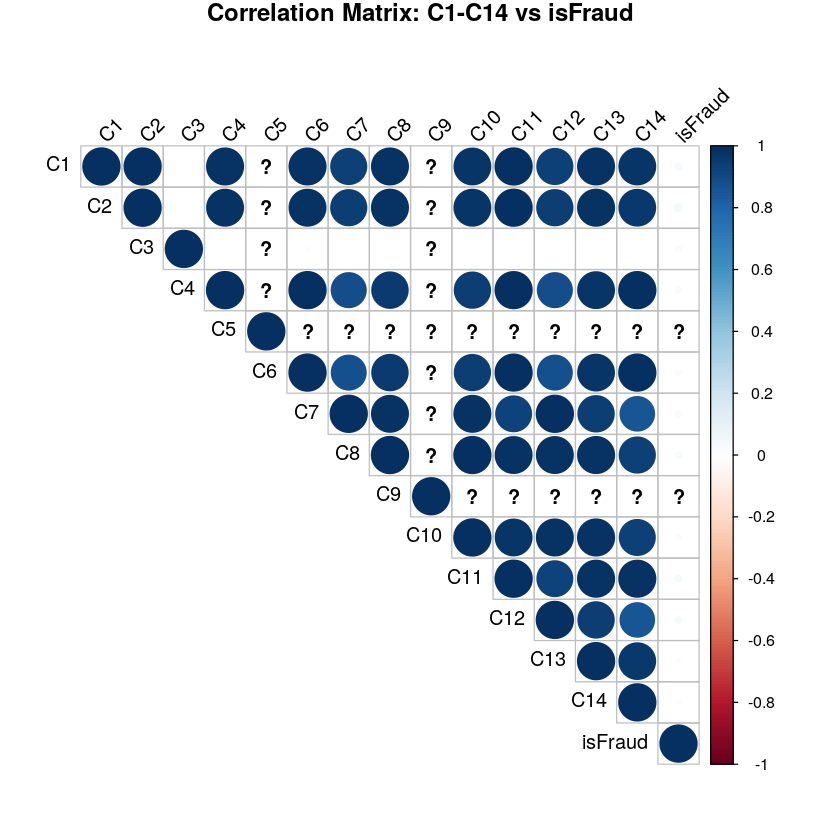


=== CORRELATION INTERPRETATION ===

STRONG POSITIVE CORRELATIONS (≥0.3):
• NA: NA - Higher values strongly associated with fraud
• NA: NA - Higher values strongly associated with fraud

MODERATE POSITIVE CORRELATIONS (0.1-0.3):
• NA: NA - Higher values moderately associated with fraud
• NA: NA - Higher values moderately associated with fraud

STRONG NEGATIVE CORRELATIONS (≤-0.3):
• NA: NA - Higher values strongly associated with legitimate transactions
• NA: NA - Higher values strongly associated with legitimate transactions

MODERATE NEGATIVE CORRELATIONS (-0.3 to -0.1):
• NA: NA - Higher values moderately associated with legitimate transactions
• NA: NA - Higher values moderately associated with legitimate transactions

MOST IMPORTANT VARIABLE: C2 (correlation: 0.0466)

SUMMARY:
• Variables with positive correlation: NA
• Variables with negative correlation: NA
• Average absolute correlation: NA

FEATURE IMPORTANCE RANKING (by absolute correlation):
1. C2: 0.0466
2. C1: 0.0397
3. C1

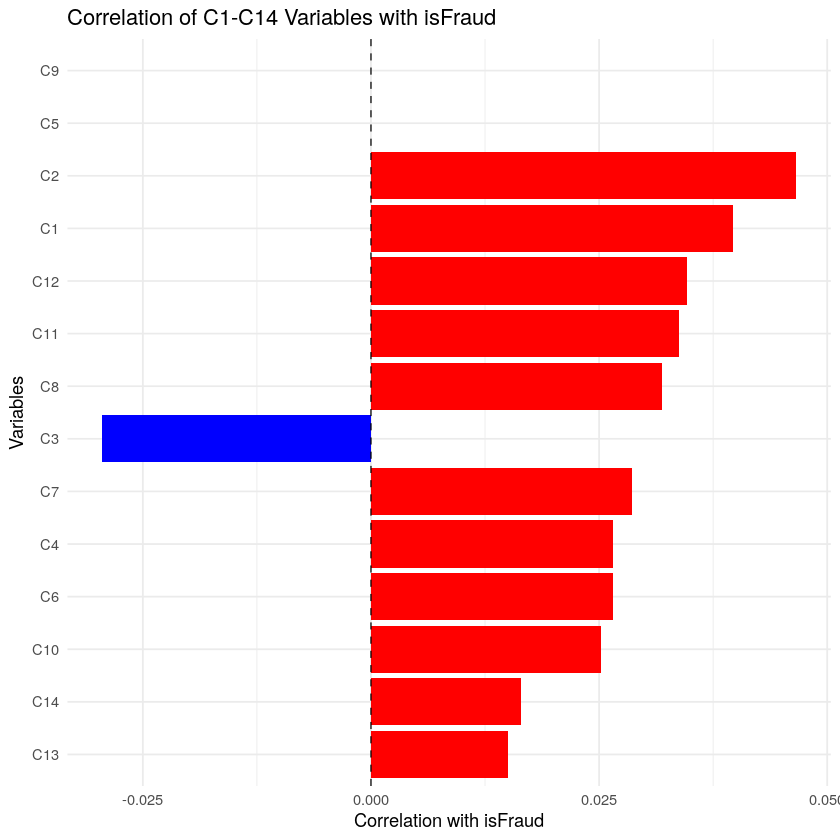

In [73]:
# view the correlation matrix between column from C1 to C14 vs isFraud ------------------------------------------------
# First, identify C1-C14 columns that exist and are numeric
c_column_names <- paste0("C", 1:14)
existing_d_columns <- intersect(c_column_names, names(data))

# Filter to only numeric C columns
numeric_c_columns <- data %>% 
  select(all_of(existing_d_columns)) %>%
  select_if(is.numeric) %>%
  names()

cat("Available C1-C14 columns:\n")
print(existing_d_columns)
cat("\nNumeric C1-C14 columns:\n")
print(numeric_c_columns)

# Calculate correlations only if we have numeric C columns
if(length(numeric_c_columns) > 0) {
  # Calculate correlation between each C column and isFraud
  correlations_with_fraud <- data %>%
    select(all_of(numeric_c_columns), isFraud) %>%
    cor(use = "complete.obs")
  
  # Extract only the correlations with isFraud (last row/column)
  fraud_correlations <- correlations_with_fraud[numeric_c_columns, "isFraud"]
  
  # Display correlations
  cat("\nCorrelations between C1-C14 and isFraud:\n")
  print(round(fraud_correlations, 4))
  
  # Create correlation plot
  corrplot(correlations_with_fraud, method = "circle", type = "upper", 
           tl.col = "black", tl.srt = 45, 
           title = "Correlation Matrix: C1-C14 vs isFraud", 
           mar = c(0,0,1,0))
  
  # Create a bar plot showing correlations with isFraud
  fraud_corr_df <- data.frame(
    Variable = names(fraud_correlations),
    Correlation = as.numeric(fraud_correlations)
  )
  
  library(ggplot2)
  ggplot(fraud_corr_df, aes(x = reorder(Variable, abs(Correlation)), y = Correlation)) +
    geom_bar(stat = "identity", fill = ifelse(fraud_corr_df$Correlation > 0, "red", "blue")) +
    coord_flip() +
    labs(title = "Correlation of C1-C14 Variables with isFraud",
         x = "Variables",
         y = "Correlation with isFraud") +
    theme_minimal() +
    geom_hline(yintercept = 0, linetype = "dashed", alpha = 0.7)
  
} else {
  cat("No numeric C1-C14 columns found in the dataset.\n")
  cat("Available columns:\n")
  print(names(data))
}

# Add interpretation after your correlation analysis
if(length(numeric_c_columns) > 0) {
  # ... existing correlation code ...
  
  # Interpret correlation results
  cat("\n=== CORRELATION INTERPRETATION ===\n")
  
  # Classify correlations by strength
  strong_positive <- fraud_correlations[fraud_correlations >= 0.3]
  moderate_positive <- fraud_correlations[fraud_correlations >= 0.1 & fraud_correlations < 0.3]
  weak_positive <- fraud_correlations[fraud_correlations > 0 & fraud_correlations < 0.1]
  
  strong_negative <- fraud_correlations[fraud_correlations <= -0.3]
  moderate_negative <- fraud_correlations[fraud_correlations <= -0.1 & fraud_correlations > -0.3]
  weak_negative <- fraud_correlations[fraud_correlations < 0 & fraud_correlations > -0.1]
  
  # Display interpretations
  if(length(strong_positive) > 0) {
    cat("\nSTRONG POSITIVE CORRELATIONS (≥0.3):\n")
    for(var in names(strong_positive)) {
      cat(sprintf("• %s: %.4f - Higher values strongly associated with fraud\n", 
                  var, strong_positive[var]))
    }
  }
  
  if(length(moderate_positive) > 0) {
    cat("\nMODERATE POSITIVE CORRELATIONS (0.1-0.3):\n")
    for(var in names(moderate_positive)) {
      cat(sprintf("• %s: %.4f - Higher values moderately associated with fraud\n", 
                  var, moderate_positive[var]))
    }
  }
  
  if(length(strong_negative) > 0) {
    cat("\nSTRONG NEGATIVE CORRELATIONS (≤-0.3):\n")
    for(var in names(strong_negative)) {
      cat(sprintf("• %s: %.4f - Higher values strongly associated with legitimate transactions\n", 
                  var, strong_negative[var]))
    }
  }
  
  if(length(moderate_negative) > 0) {
    cat("\nMODERATE NEGATIVE CORRELATIONS (-0.3 to -0.1):\n")
    for(var in names(moderate_negative)) {
      cat(sprintf("• %s: %.4f - Higher values moderately associated with legitimate transactions\n", 
                  var, moderate_negative[var]))
    }
  }
  
  # Find most important variables
  most_correlated <- names(fraud_correlations)[which.max(abs(fraud_correlations))]
  cat(sprintf("\nMOST IMPORTANT VARIABLE: %s (correlation: %.4f)\n", 
              most_correlated, fraud_correlations[most_correlated]))
  
  # Summary statistics
  cat(sprintf("\nSUMMARY:\n"))
  cat(sprintf("• Variables with positive correlation: %d\n", 
              sum(fraud_correlations > 0)))
  cat(sprintf("• Variables with negative correlation: %d\n", 
              sum(fraud_correlations < 0)))
  cat(sprintf("• Average absolute correlation: %.4f\n", 
              mean(abs(fraud_correlations))))
  
  # Feature importance ranking
  importance_ranking <- sort(abs(fraud_correlations), decreasing = TRUE)
  cat("\nFEATURE IMPORTANCE RANKING (by absolute correlation):\n")
  for(i in 1:min(5, length(importance_ranking))) {
    var_name <- names(importance_ranking)[i]
    cat(sprintf("%d. %s: %.4f\n", i, var_name, fraud_correlations[var_name]))
  }
}

# A tibble: 2 × 5
  id_12    FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>         <int>         <int>           <dbl>              <dbl>
1 Found          1269         13176            8.79               91.2
2 NotFound      10049         75506           11.7                88.3


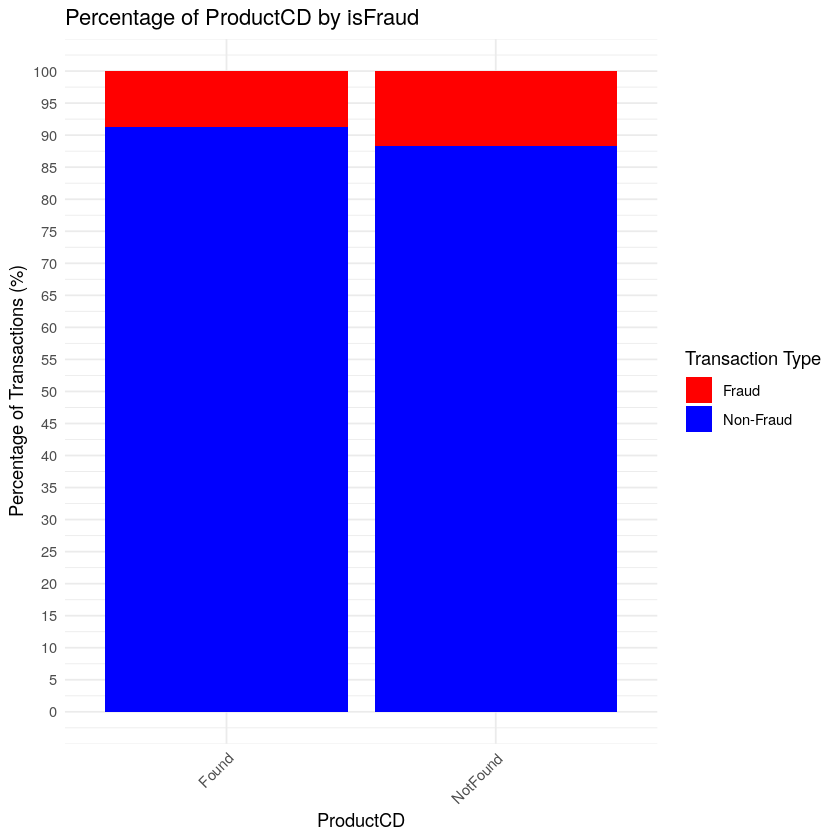

In [74]:
# view the percentage of id12 group by isFraud ------------------------------------------------
id12_fraud_percentage <- data %>%
  group_by(id_12) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id12_fraud_percentage)

# visualize the percentage of id12 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
id12_plot_data <- id12_fraud_percentage %>%
  select(id_12, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(id12_plot_data, aes(x = id_12, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of ProductCD by isFraud",
       x = "ProductCD",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")   

Available C1-C14 columns:
[1] "D1"  "D8"  "D9"  "D11"

Numeric C1-C14 columns:
[1] "D1" "D8" "D9"

Correlations between D1-D15 and isFraud:
     D1      D8      D9 
-0.0747 -0.1687 -0.0502 


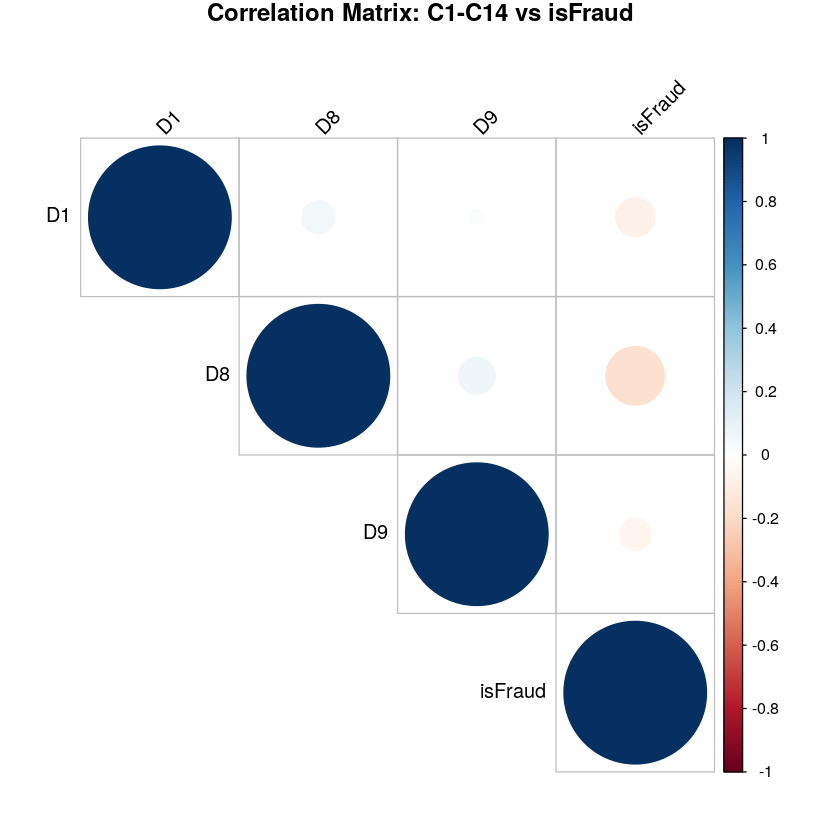


=== CORRELATION INTERPRETATION ===

MODERATE NEGATIVE CORRELATIONS (-0.3 to -0.1):
• D8: -0.1687 - Higher values moderately associated with legitimate transactions

MOST IMPORTANT VARIABLE: D8 (correlation: -0.1687)

SUMMARY:
• Variables with positive correlation: 0
• Variables with negative correlation: 3
• Average absolute correlation: 0.0979

FEATURE IMPORTANCE RANKING (by absolute correlation):
1. D8: -0.1687
2. D1: -0.0747
3. D9: -0.0502


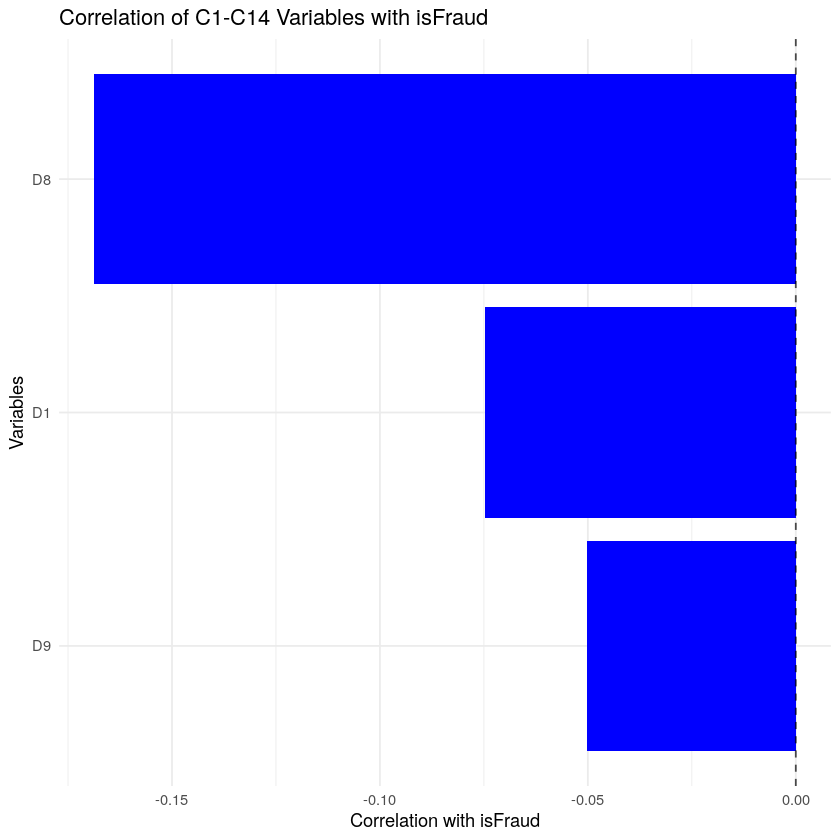

In [75]:
# view the correlation matrix between column from D1 to D15 vs isFraud ------------------------------------------------
# First, identify D1-D15 columns that exist and are numeric
d_column_names <- paste0("D", 1:15)
existing_d_columns <- intersect(d_column_names, names(data))

# Filter to only numeric C columns
numeric_d_columns <- data %>% 
  select(all_of(existing_d_columns)) %>%
  select_if(is.numeric) %>%
  names()

cat("Available C1-C14 columns:\n")
print(existing_d_columns)
cat("\nNumeric C1-C14 columns:\n")
print(numeric_d_columns)

# Calculate correlations only if we have numeric C columns
if(length(numeric_d_columns) > 0) {
  # Calculate correlation between each C column and isFraud
  correlations_with_fraud <- data %>%
    select(all_of(numeric_d_columns), isFraud) %>%
    cor(use = "complete.obs")
  
  # Extract only the correlations with isFraud (last row/column)
  fraud_correlations <- correlations_with_fraud[numeric_d_columns, "isFraud"]
  
  # Display correlations
  cat("\nCorrelations between D1-D15 and isFraud:\n")
  print(round(fraud_correlations, 4))
  
  # Create correlation plot
  corrplot(correlations_with_fraud, method = "circle", type = "upper", 
           tl.col = "black", tl.srt = 45, 
           title = "Correlation Matrix: C1-C14 vs isFraud", 
           mar = c(0,0,1,0))
  
  # Create a bar plot showing correlations with isFraud
  fraud_corr_df <- data.frame(
    Variable = names(fraud_correlations),
    Correlation = as.numeric(fraud_correlations)
  )
  
  library(ggplot2)
  ggplot(fraud_corr_df, aes(x = reorder(Variable, abs(Correlation)), y = Correlation)) +
    geom_bar(stat = "identity", fill = ifelse(fraud_corr_df$Correlation > 0, "red", "blue")) +
    coord_flip() +
    labs(title = "Correlation of C1-C14 Variables with isFraud",
         x = "Variables",
         y = "Correlation with isFraud") +
    theme_minimal() +
    geom_hline(yintercept = 0, linetype = "dashed", alpha = 0.7)
  
} else {
  cat("No numeric C1-C14 columns found in the dataset.\n")
  cat("Available columns:\n")
  print(names(data))
}

# Add interpretation after your correlation analysis
if(length(numeric_d_columns) > 0) {
  # ... existing correlation code ...
  
  # Interpret correlation results
  cat("\n=== CORRELATION INTERPRETATION ===\n")
  
  # Classify correlations by strength
  strong_positive <- fraud_correlations[fraud_correlations >= 0.3]
  moderate_positive <- fraud_correlations[fraud_correlations >= 0.1 & fraud_correlations < 0.3]
  weak_positive <- fraud_correlations[fraud_correlations > 0 & fraud_correlations < 0.1]
  
  strong_negative <- fraud_correlations[fraud_correlations <= -0.3]
  moderate_negative <- fraud_correlations[fraud_correlations <= -0.1 & fraud_correlations > -0.3]
  weak_negative <- fraud_correlations[fraud_correlations < 0 & fraud_correlations > -0.1]
  
  # Display interpretations
  if(length(strong_positive) > 0) {
    cat("\nSTRONG POSITIVE CORRELATIONS (≥0.3):\n")
    for(var in names(strong_positive)) {
      cat(sprintf("• %s: %.4f - Higher values strongly associated with fraud\n", 
                  var, strong_positive[var]))
    }
  }
  
  if(length(moderate_positive) > 0) {
    cat("\nMODERATE POSITIVE CORRELATIONS (0.1-0.3):\n")
    for(var in names(moderate_positive)) {
      cat(sprintf("• %s: %.4f - Higher values moderately associated with fraud\n", 
                  var, moderate_positive[var]))
    }
  }
  
  if(length(strong_negative) > 0) {
    cat("\nSTRONG NEGATIVE CORRELATIONS (≤-0.3):\n")
    for(var in names(strong_negative)) {
      cat(sprintf("• %s: %.4f - Higher values strongly associated with legitimate transactions\n", 
                  var, strong_negative[var]))
    }
  }
  
  if(length(moderate_negative) > 0) {
    cat("\nMODERATE NEGATIVE CORRELATIONS (-0.3 to -0.1):\n")
    for(var in names(moderate_negative)) {
      cat(sprintf("• %s: %.4f - Higher values moderately associated with legitimate transactions\n", 
                  var, moderate_negative[var]))
    }
  }
  
  # Find most important variables
  most_correlated <- names(fraud_correlations)[which.max(abs(fraud_correlations))]
  cat(sprintf("\nMOST IMPORTANT VARIABLE: %s (correlation: %.4f)\n", 
              most_correlated, fraud_correlations[most_correlated]))
  
  # Summary statistics
  cat(sprintf("\nSUMMARY:\n"))
  cat(sprintf("• Variables with positive correlation: %d\n", 
              sum(fraud_correlations > 0)))
  cat(sprintf("• Variables with negative correlation: %d\n", 
              sum(fraud_correlations < 0)))
  cat(sprintf("• Average absolute correlation: %.4f\n", 
              mean(abs(fraud_correlations))))
  
  # Feature importance ranking
  importance_ranking <- sort(abs(fraud_correlations), decreasing = TRUE)
  cat("\nFEATURE IMPORTANCE RANKING (by absolute correlation):\n")
  for(i in 1:min(5, length(importance_ranking))) {
    var_name <- names(importance_ranking)[i]
    cat(sprintf("%d. %s: %.4f\n", i, var_name, fraud_correlations[var_name]))
  }
}

In [ ]:
# proceed to data preprocessing and feature engineering for modeling
# including handling missing values, encoding categorical variables, feature scaling,
# and creating new features as needed based on the insights gained from EDA.
# Ensure necessary libraries are loaded

Importance of components:
                          PC1    PC2     PC3     PC4     PC5
Standard deviation     1.7093 1.2089 0.66240 0.36756 0.20715
Proportion of Variance 0.5844 0.2923 0.08775 0.02702 0.00858
Cumulative Proportion  0.5844 0.8766 0.96440 0.99142 1.00000

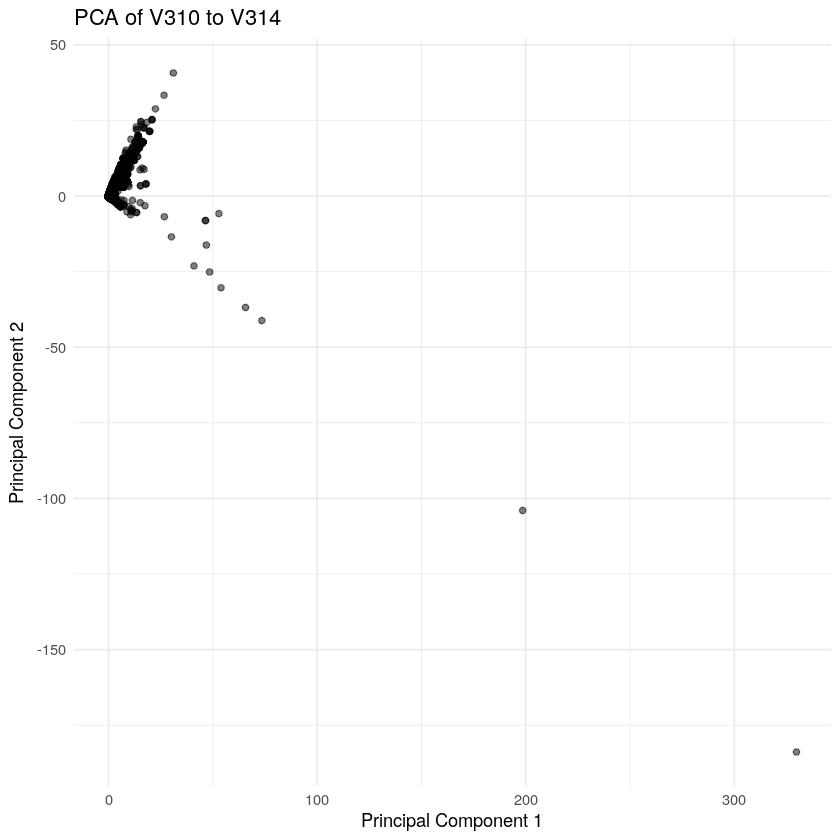

In [83]:
# proceed PCA analysis for dimensionality reducction for column from v310 to v314
pca_columns <- paste0("V", 310:314)
existing_pca_columns <- intersect(pca_columns, names(data))
pca_data <- data %>% select(all_of(existing_pca_columns)) %>% select_if(is.numeric)
pca_data <- na.omit(pca_data)  # Remove rows with NA values
pca_result <- prcomp(pca_data, center = TRUE, scale. = TRUE)
summary(pca_result)
# Visualize PCA results
library(ggplot2)
pca_df <- as.data.frame(pca_result$x)
ggplot(pca_df, aes(x = PC1, y = PC2)) +
  geom_point(alpha = 0.5) +
  labs(title = "PCA of V310 to V314", x = "Principal Component 1", y = "Principal Component 2") +
  theme_minimal()

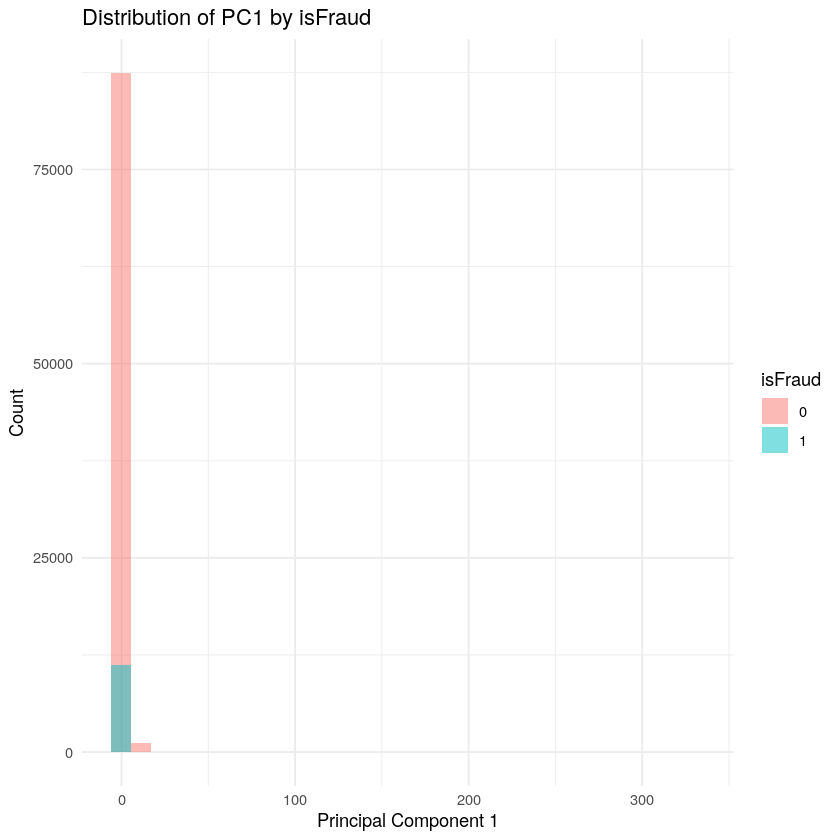

In [84]:
# View the relation between PC1 and isFraud
data_with_pca <- data %>%
  select(all_of(existing_pca_columns), isFraud) %>%
  na.omit()  # Remove rows with NA values
data_with_pca <- cbind(data_with_pca, pca_result$x[rownames(data_with_pca), ])
ggplot(data_with_pca, aes(x = PC1, fill = factor(isFraud))) +
  geom_histogram(position = "identity", alpha = 0.5, bins = 30) +
  labs(title = "Distribution of PC1 by isFraud", x = "Principal Component 1", y = "Count", fill = "isFraud") +
  theme_minimal()